<h1> Welcome to the Southern Water Corp Python Case Study!</h1>

While working on the Statistics unit, you used Microsoft Excel's data analytics capabilities to analyze Southern Water Corp's Pump Data.

You might have realised that whilst `Excel` is powerful, it was a bit tricky creating Box Plots, multiple line plots and in general, doing quick analysis in Excel.

In this Case Study, we're going to *revisit* the Pump Data, but add in a few different questions that help us better see how we can use Python to speed up our analysis as well as showing you how powerful Python's plotting and modelling libraries can be! 


<b>`Please note that this case study is composed of two parts** — once you have completed part 1, which involves descriptive statistics, please submit your work and discuss it with your mentor before moving on to part 2.`</b>

<H3>  Let's get started! </H3>

<img src = 'https://www.sdcwa.org/wp-content/uploads/2020/10/Seawater-Desalination.jpg'>

---

# Part I: <span style="color:green">Descriptive Statistics</span>

## Step 1: <span style="color:green">Import Libraries</span> 

Import the libraries you'll need for your analysis. You will need the following libraries: 

**Matplotlib** - This is Python's basic plotting library.
You'll use the pyplot and dates function collections from matplotlib throughout this case study so we encourage you to important these two specific libraries with their own aliases. Also, include the line **'%matplotlib inline'** so that your graphs are easily included in your notebook. 

**Seaborn** - This library will enable you to create aesthetically pleasing plots.

**Pandas** - This library will enable you to view and manipulate your data in a tabular format.

**statsmodels.api** - This library will enable you to create statistical models. You will need this library when performing regession analysis in Part 2 of this case study.

Please note we've included the necessary libraries below for you to help you get started!

This code controls how big your charts will be with the syntax of (X,Y) where X represents the X Axis and Y, the Y Axis.

## Place your code here

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

---------------------------------------------------------------------------


## Step 2: <span style="color:green">Descriptive Statistics</span> 
The data you've received from Southern Water Corp has been split into two files.
The first file, titled DF_Raw_Data contains all the 'raw' Pump Data you will need for your analysis.
The second file, titled DF_Rolling_Stdev contains the Rolling Standard Deviation Data you will need for questions 10 Onwards.

We have **deliberately** set up the data in this manner so please ensure that when you need to perform the rolling standard deviation calculations, you use the **DF_Rolling_Stdev.csv** file.



<h3> Please complete the following below: </h3>

i. Import each of the two data sources and store them into their individual dataframes. 

We suggest you use the names : **dataframe_raw & dataframe_stdev respectively**. 

ii. Print descriptive statistics for each of the dataframes using **.describe()** and **.info()**

In [2]:
dataframe_raw= pd.read_csv('DF_Raw_Data.csv')
dataframe_stdev= pd.read_csv('DF_Rolling_Stdev.csv')

#### Data_frame Raw

In [3]:
# info and describe each dataframe
print(dataframe_raw.info())
print(dataframe_raw.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2453 entries, 0 to 2452
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data Source              2453 non-null   object 
 1   TIMEFRAME (DD/MM/YYYY)   2453 non-null   object 
 2   Volumetric Flow Meter 1  2453 non-null   float64
 3   Volumetric Flow Meter 2  2453 non-null   float64
 4   Pump Speed (RPM)         2453 non-null   int64  
 5   Pump Torque              2453 non-null   int64  
 6   Ambient Temperature      2453 non-null   int64  
 7   Horse Power              2453 non-null   float64
 8   Pump Efficiency          2453 non-null   float64
 9   PUMP FAILURE (1 or 0)    2453 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 191.8+ KB
None
       Volumetric Flow Meter 1  Volumetric Flow Meter 2  Pump Speed (RPM)  \
count              2453.000000              2453.000000       2453.000000   
mean                 4

#### Dataframe_Stdev

In [4]:
print(dataframe_stdev.info())
print(dataframe_stdev.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data Source              2452 non-null   object 
 1   TIMEFRAME (DD/MM/YYYY)   2452 non-null   object 
 2   Volumetric Flow Meter 1  2452 non-null   float64
 3   Volumetric Flow Meter 2  2452 non-null   float64
 4   Pump Speed (RPM)         2452 non-null   float64
 5   Pump Torque              2452 non-null   float64
 6   Ambient Temperature      2452 non-null   float64
 7   Horse Power              2452 non-null   float64
 8   Pump Efficiency          2452 non-null   float64
 9   PUMP FAILURE (1 or 0)    2452 non-null   int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 191.7+ KB
None
       Volumetric Flow Meter 1  Volumetric Flow Meter 2  Pump Speed (RPM)  \
count              2452.000000              2452.000000       2452.000000   
mean                  

<b> When looking at the Descriptive Statistics for both datasets; pay attention specifically to the standard deviation and mean. 
What do you observe when you compare the dataframe_raw standard deviation and mean, versus the dataframe_stdev standard deviation and mean?
    
Place your answer below. </b>

#### Standard Deviation vs. Mean
When looking at standard deviation, we can see that the variables with the greatest variation in values are (1)Pump Torque, (2)Pump Speed, and (3)Pump Efficiency, in both raw values and the stabdard deviation dataset. These large values in standard variation correspond to the broad distance between these values' mean and their corresponding maximun and minumum values. 

#### Comparing summary statistics between the two dataframes
Mean values, understandably, drop when looking at only standard deviations, whilst the standard deviuations only drop significantly when the distance from extreme values and mean (variance) are dramatic, as is thge case with the three vriables discussed above.

---------------------------------------------------------------------------

## Step 3: <span style="color:green">Create a Boxplot</span> 

When you look at your dataframe, you should now be able to see the upper and lower quartiles for each row of data from the **.describe** command you used previously.

This should give you an understanding of the number of entires in each dataset (~2,452). 

However, just as you learned when using Excel, creating a visualization of the data using Python is often more informative than viewing the table statistics. Next up — convert the dataframes you created into a boxplot by following these instructions:

<H3> <span style="color:green"> Please repeat these steps for both the dataframe_raw dataset and the dataframe_stdev dataset </span></H3> 

i) Using the dataframe, create a boxplot visualising this information.

ii) Using the dataframe, create a lineplot visualising this information.

An example of the syntax to consider would be:

    dataframe.plot(kind='box')
    plt.show()

Hint: You might want to reference the following .plot function <a href = https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html> here </a> 


### Dataset_Raw Boxplot and Line Plot

#### Boxplot

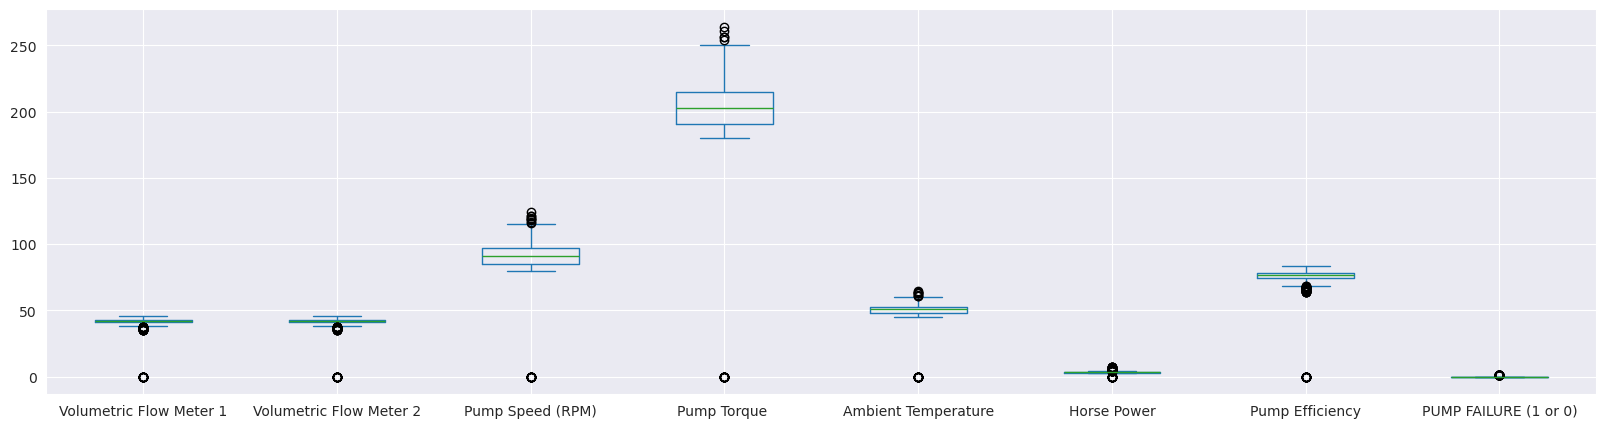

In [5]:
dataframe_raw.plot(kind= 'box')
plt.show()

#### Lineplot

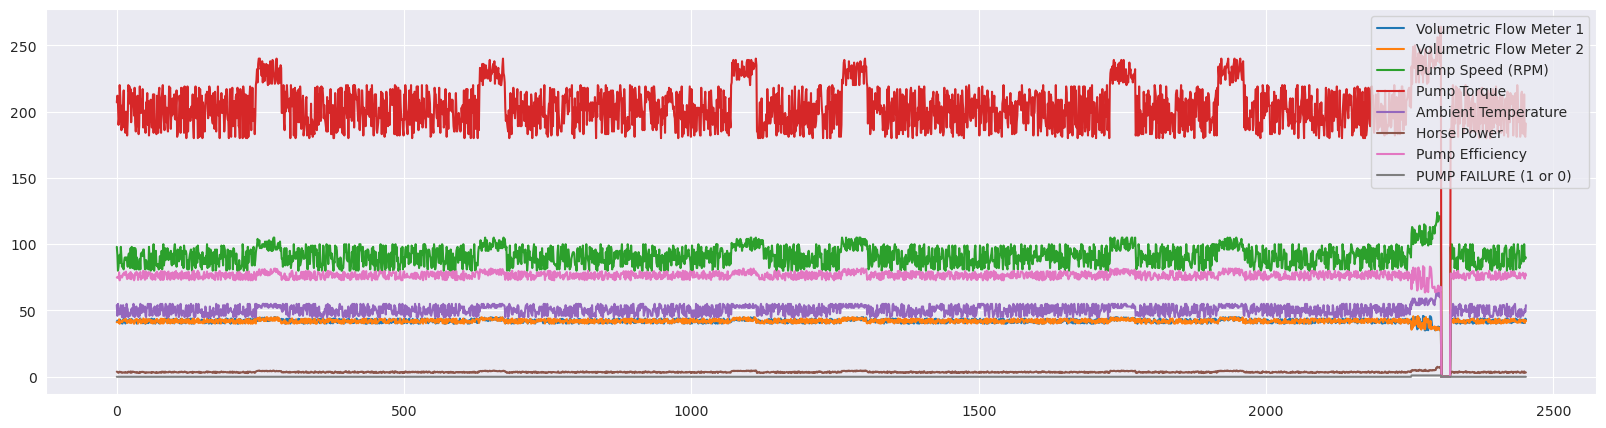

In [6]:
dataframe_raw.plot(kind= 'line')
plt.show()

### Dataset_StDev Boxplot and Line Plot

#### Boxplot

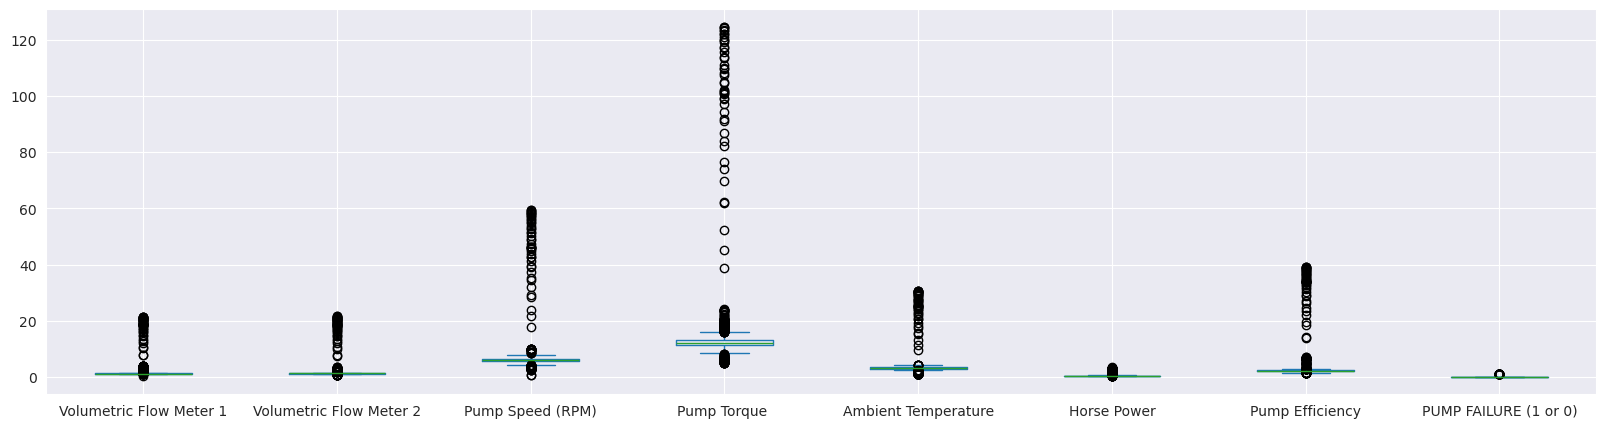

In [7]:
dataframe_stdev.plot(kind= 'box')
plt.show()

#### Lineplot

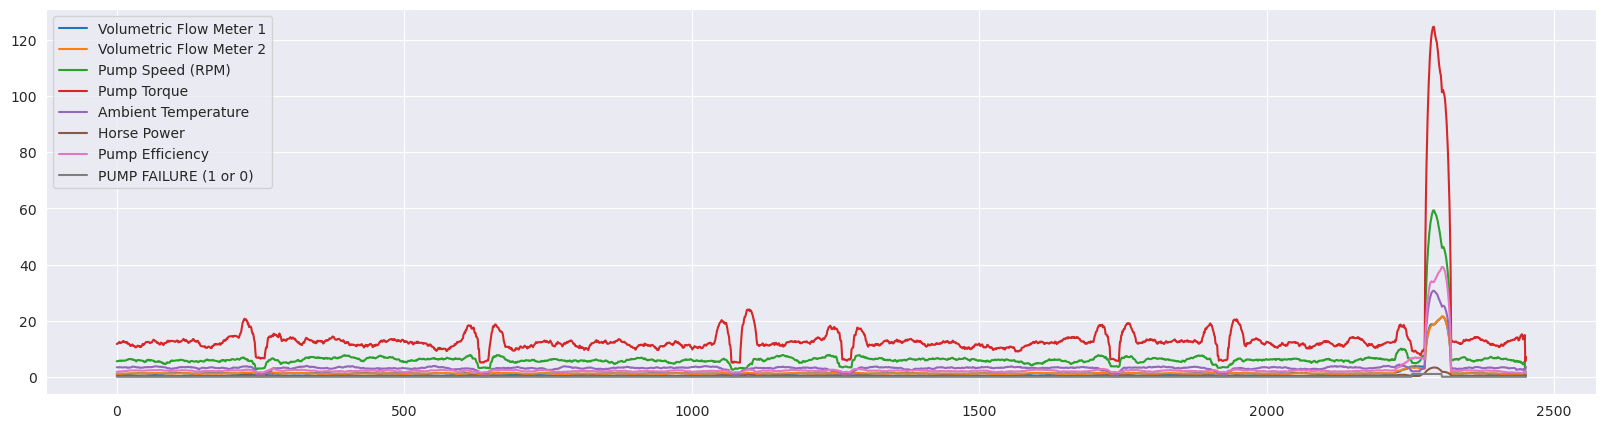

In [8]:
dataframe_stdev.plot(kind= 'line')
plt.show()

#### We've included an example of what your Box Plot and Line Plot *should* look like once you've plotted this using the dataframe_raw and dataframe_stdev datasets.

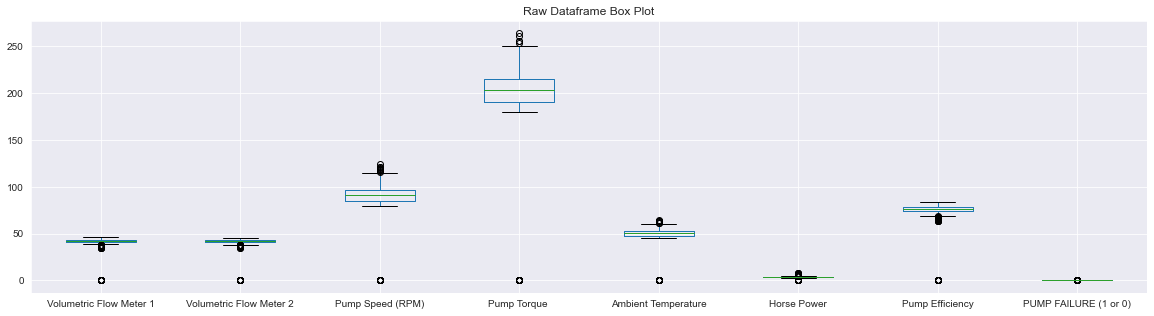

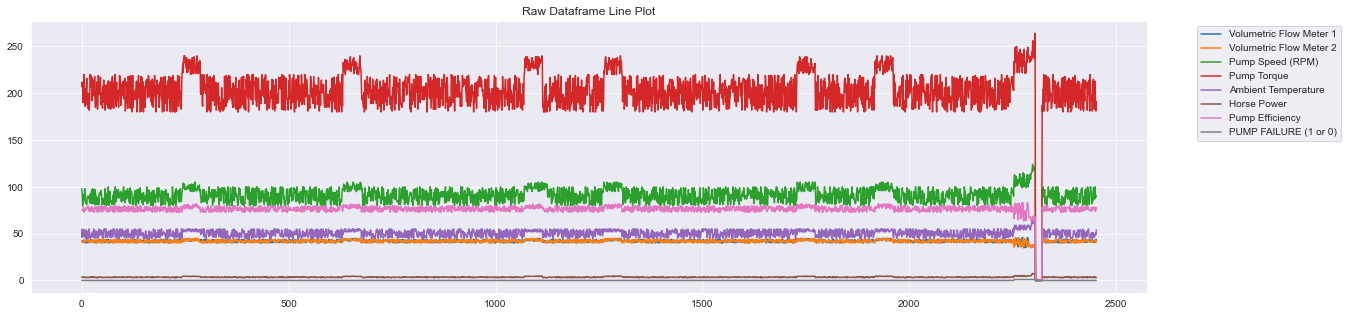

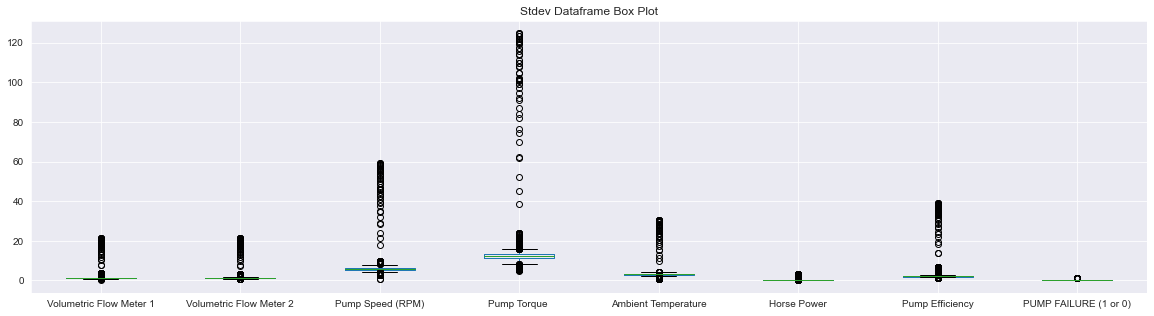

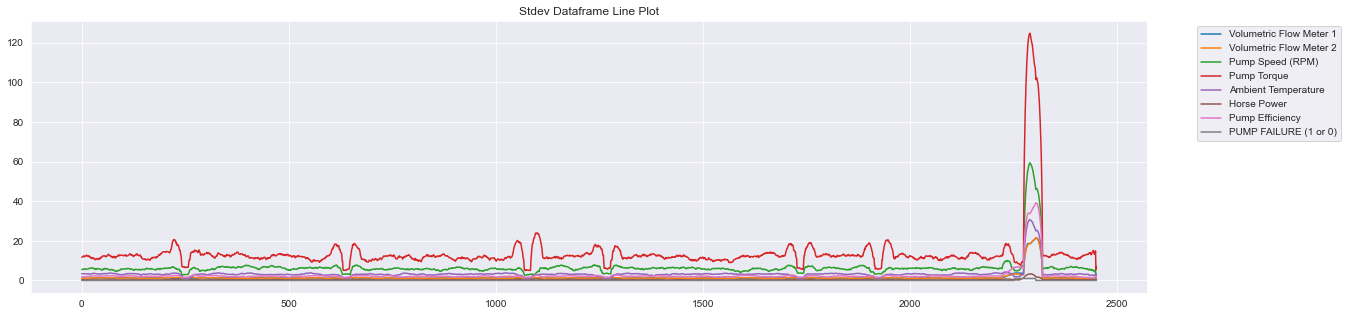

**What have you observed from the boxplot and line plots for both the dataframe_raw and dataframe_stdev datasets?**

### Dataframe_raw observations
In the boxplots- Pump torque shows the greatest dispersion with significant outliers to the right of the distribution. 
The line plot shows a pattern of periodic intervals of rising values with an abnormal interval in which some variables gradually increase or decrease beyond typical variance and suddenly drop around pump failure (at 0).
### Dataframe_stdev observations
In the boxplots, significant outliers to the right of the distributions can be seen for all variables except horse power, with pump torque being the most dramatic case.

The line plot shows a similar abnormality as the line plot for the raw values happening around pump failure. However, the lines are smoother and studently upwards to hit maximum values around pump failure. 

---------------------------------------------------------------------------

---------------------------------------------------------------------------

## Step 4: <span style="color:green">Filtered Dataframes with Box Plots</span> 

You would have noted the datasets we have contain a Pump Failure (1 or 0) Variable that indicate whether the Pump is Failing (1) or whether the Pump is behaving normally (0).  
    
It is very likely we will see differences in the overall populations of Pre-Failure vs. Post Failure.
To visualise this difference, we should separate our datasets, filtering for when the Pump Failure is = 0 or when the Pump Failure =1 and see what trends emerge. 
    
This will require you to <b> SUBSET </b> your dataframe using *boolean filters*.

We've included an example below to show-case how this syntax works:

    condition_1 = dataframe['SomeColumn']== 1
    dataframe_0 = dataframe[condition_1] 
    dataframe.plot(kind='box')
    plt.title("Example Plot")
    plt.show()
    

<H3> <span style="color:green"> Please repeat these steps for both the dataframe_raw dataset and the dataframe_stdev dataset </span></H3> 

i) Using the dataframe_raw dataset, create two boxplots specifically for when the Pump has failed (i.e. Pump Failure = 1)  and 0 (Pump is in normal operations). 

As part of best practice, don't forget to clearly title your box plots so we can identify which plot is for the failure and which plot is for the normal operations.

To do this, you'll have to recall how to apply **boolean** filtering to a dataframe. If you're not sure how to do this, re-read the hints we've given above and pay careful attention to the Syntax we've shown.



## Please put your code here

### Dataset_Raw

#### Boolean filters and subsets

In [9]:

raw_fail_bool= dataframe_raw['PUMP FAILURE (1 or 0)']==1
pump_fail_raw=dataframe_raw[raw_fail_bool]

raw_normal_bool= dataframe_raw['PUMP FAILURE (1 or 0)']==0
pump_normal_raw= dataframe_raw[raw_normal_bool]

#### Boxplot: Normal Pump Function

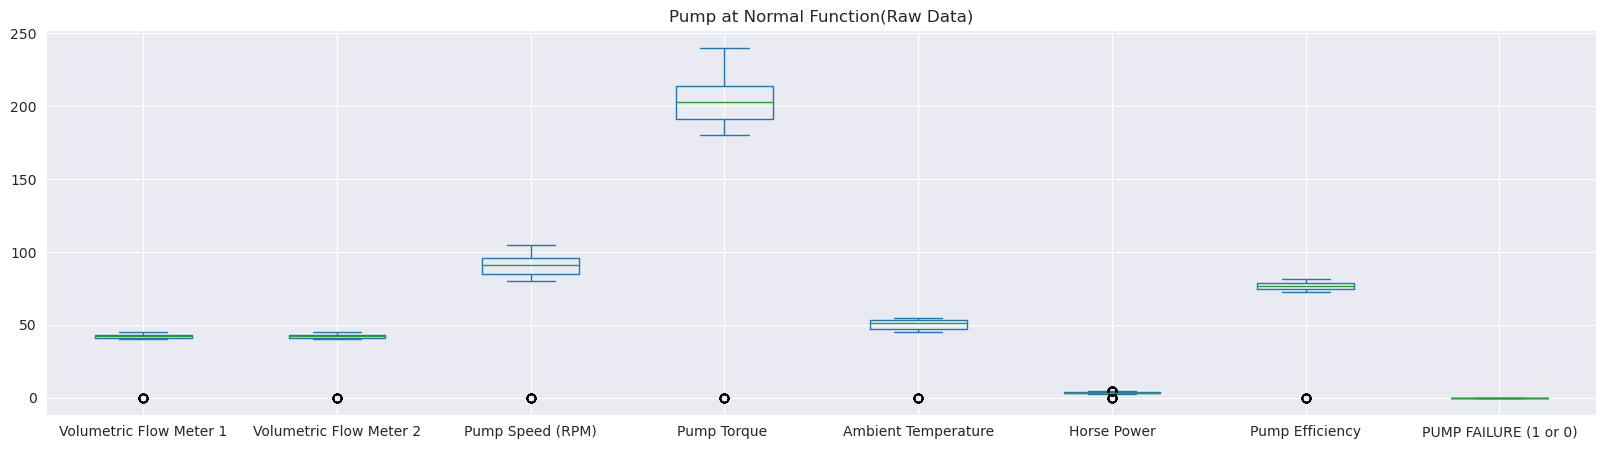

In [10]:
pump_normal_raw.plot(kind='box')
plt.title('Pump at Normal Function(Raw Data)')
plt.show()

#### Boxplot: Pump Failure

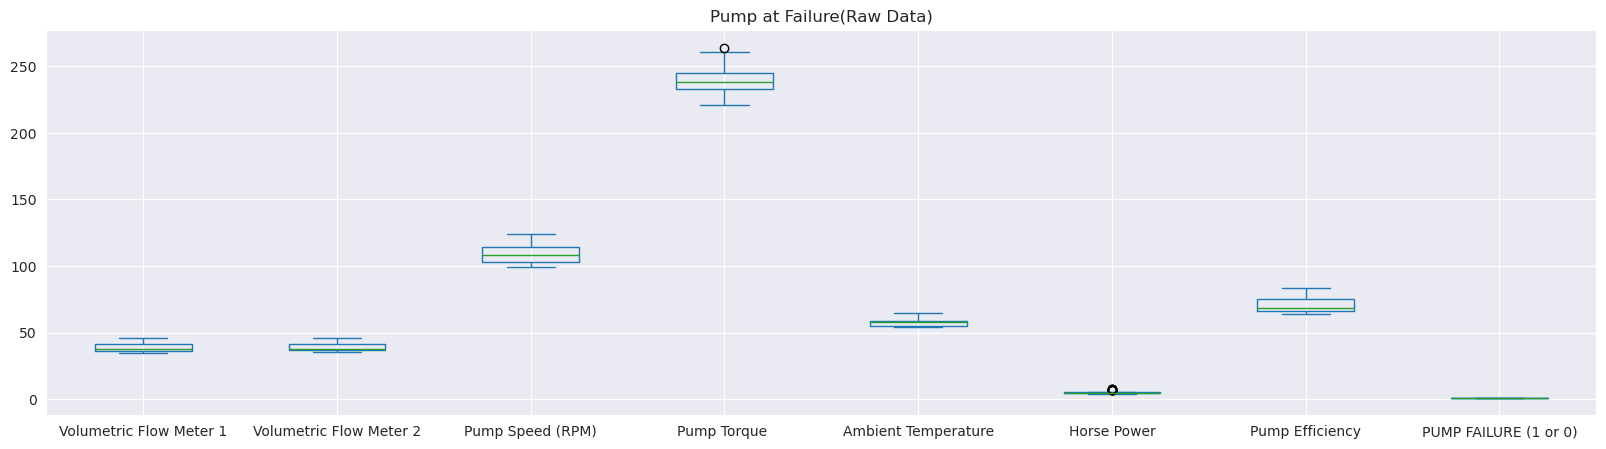

In [11]:
pump_fail_raw.plot(kind='box')
plt.title('Pump at Failure(Raw Data)')
plt.show()

### Dataset_stdev

In [12]:

std_fail_bool= dataframe_stdev['PUMP FAILURE (1 or 0)']==1
std_fail_pump=dataframe_stdev[std_fail_bool]

std_normal_bool= dataframe_stdev['PUMP FAILURE (1 or 0)']==0
std_normal_pump= dataframe_stdev[std_normal_bool]

#### Boxplot: Normal Pump Function

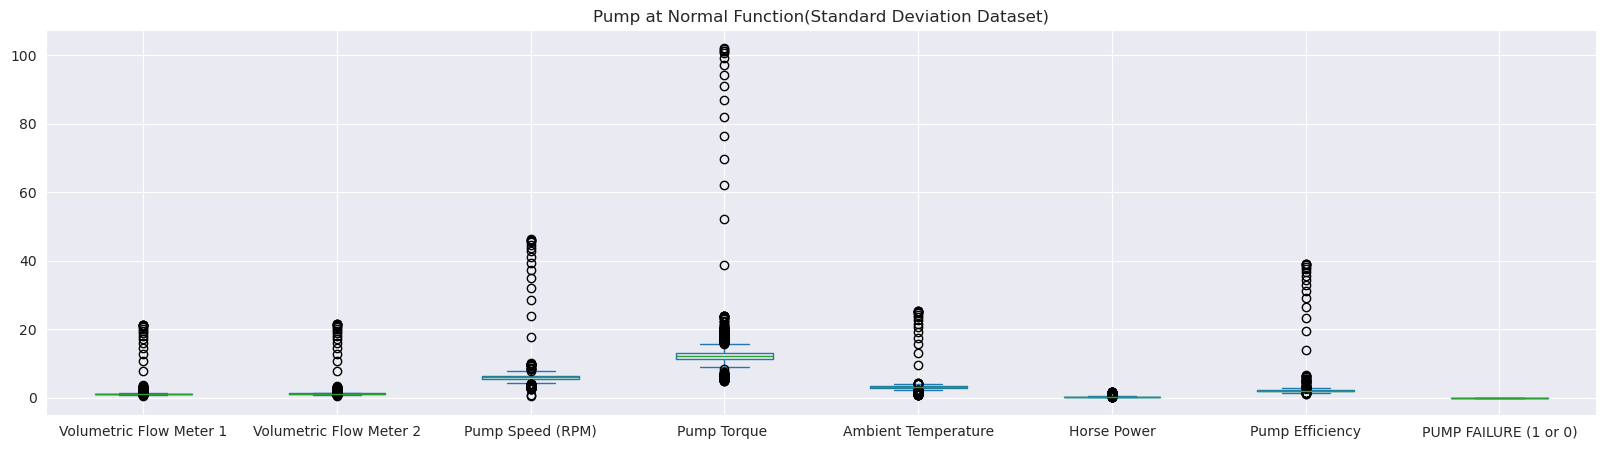

In [13]:
std_normal_pump.plot(kind='box')
plt.title('Pump at Normal Function(Standard Deviation Dataset)')
plt.show()

#### Boxplot: Pump Failure

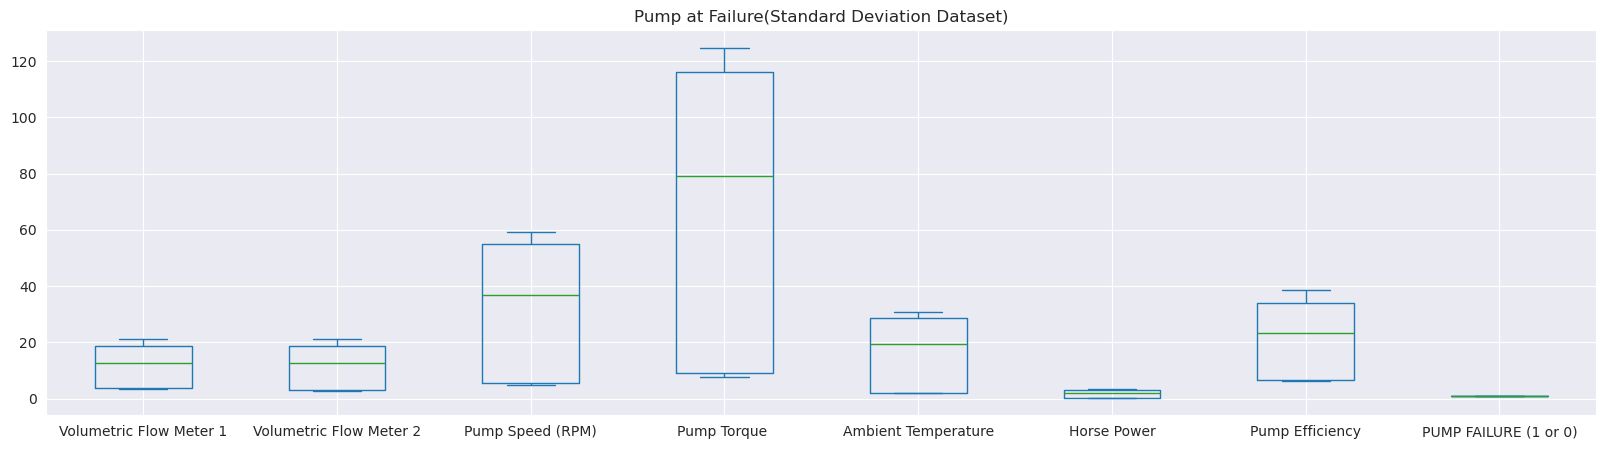

In [14]:
std_fail_pump.plot(kind='box')
plt.title('Pump at Failure(Standard Deviation Dataset)')
plt.show()

<h3> What have you noticed when you compared the dataset in this manner? </h3>

### Dataframe_raw boxplots observations
The variance for the normal function raw values seem fairly small with a generally normal distribution, with pump torque displaying the greatest variance and moderate right skew. 

The values at failure are difficult to see, perhaps because a range large enough to cover all values for all variables obscures the relative distances within boxplots; however, we can appreciate clear right skewing on the volumetric flow meters, ambient temperature, pump speed, and pump efficiency and a moderate rely normal distribution in pump torque with longer tails on both left and right- showing higher variance. 

### Dataframe_stdev boxplot observations
When looking at values during normal function, it is difficult to appreciate values as a result of the same scaling issue discussed above; however, we can see a great number of outliers for all variables except horse power. These outliers result in significant rightly skewed distributions. 
 Lastly, the boxplots here give the most clarity in each variables' distributions, showing moderate left skews in volumetric flow meters, more significant left skews for ambient temperature, pump efficiency, pump speed and pump torque, with the last two displaying the greatest dispersion. 

---------------------------------------------------------------------------

Now a quick analysis might show-case there are many *outliers* that exist in our dataset.

As we all know, Outliers can easily *skew* our analysis and we might want to remove them.

Let's experiment with removing Outliers with the following steps:

The general logic for removing an outliers is:

<b> Any Value that is either Q1 - 1.5x IQR or greater than Q3 + 1.5x IQR is considered an outlier. </b>

Where Q1 = Quartile 1 and Q3 = Quartile 3

Let's break these down to a few simple steps and tackle how to calculate this.

<b>

    1. Define the Quartiles Q1 and Q3. 
    
    2. Calculate the Interquartile Range (Q3 - Q1)
    
    3. Create two new variables; Lower_Range (Q1 - 1.5x IQR) and Upper_Range ( Q3 + 1.5x IQR).
    
    4. Using Boolean Subsetting, filter the Dataframe for Outliers and remove them
    
    5. Calculate what the proportion of Outliers exist (i.e. Number of entries left after Outlier removal / Number of total entries in dataset) 

</b>

## Step 5: <span style="color:green">Create Quartiles</span> 

Create two new variables called Q1 and Q3 using the dataframe_raw dataset. 

i) Q1 should contain the <b> 25th percentile for all columns in the dataframe while Q3 should contain the 75th percentile </b> for all the columns in the dataframe.

You may want to use the .quantile() function explained <a href = https://www.geeksforgeeks.org/python-pandas-dataframe-quantile/> here </a> 

ii) After defining Q1 and Q3, calculate the interquartile range **(IQR = Q3 - Q1)** for all columns in the dataframe and print it to the screen.

We've included a sample of the IQR output below for your reference!

## Please put your code here

### Dataframe_raw: Q1, Q3, and IQR

In [15]:
# using 'numeric_only' to forgfo invalid parameters 
q1 = dataframe_raw.quantile(0.25, numeric_only=True)
q2 = dataframe_raw.quantile(0.75, numeric_only=True)
iqr = q2 - q1
print(iqr)

Volumetric Flow Meter 1     2.09
Volumetric Flow Meter 2     2.13
Pump Speed (RPM)           12.00
Pump Torque                24.00
Ambient Temperature         5.00
Horse Power                 0.56
Pump Efficiency             3.91
PUMP FAILURE (1 or 0)       0.00
dtype: float64


---------------------------------------------------------------------------

## Step 6: <span style="color:green">Identify Outliers</span> 

Continuing in from Step 5 - we still need to calculate how we can remove our outliers.

We're aware of the overall formula as shown per below.

<b> Outlier = Q1 - 1.5x IQR OR Q3 + 1.5x IQR </b>

Now let's work out how we can identify these Outliers step by step. 

<b> i) Define two new variables, Lower_Limit and Upper_Limit can be calculated as:</b>
<p>
<li> Lower_Limit = Q1 - 1.5 * IQR </li>
<li> Upper_Limit = Q3 + 1.5 * IQR </li> 
   
<b> ii) Using Lower_Limit and Upper_Limit with an OR (|) condition, filter the dataframe to include *only* the Outliers. How many Outliers do we have?</b>
    
The syntax should look like this:
    
<b>`Outliers = dataframe_raw[((dataframe_raw[IQR.index] < lower_limit) | ((dataframe_raw[IQR.index] > upper_limit))).any(axis=1)]`</b>
    
The `.any(axis=1)` indicates that for *any* entry in the columns that matches the criteria of being *less* than the lower limit or *greater* than the upper limit, for that column (axis=1), that row will be removed. 

If you're stuck, <a href = https://stackoverflow.com/questions/54398554/how-to-remove-outliers-in-python> here's </a> a link that will show you how you can remove Outliers in Python! 

<b> iii) What is the percentage of data that remains after we've removed the Outliers from the dataframe_raw dataset?</b>
    

## Please put your code here

### Defining lower and upper limits, and identifying outliers

In [16]:
lower_limit= q1 - 1.5 * iqr
upper_limit= q2 + 1.5 * iqr

outliers = dataframe_raw[((dataframe_raw[iqr.index] < lower_limit) | ((dataframe_raw[iqr.index] > upper_limit))).any(axis=1)]

### Percentage of data after removing outliers

In [17]:
# total rows in the dataset
total_rows= len(dataframe_raw)
# total rows minus outliers
datapoints_minus_outliers= total_rows - len(outliers)
# percentage of rows that are not outliers
percentage= (datapoints_minus_outliers/total_rows)*100
print(percentage)

96.12719119445576


<b> Now that you've removed the Outliers and discovered you still have a significant amount of data left - do you think removing Outliers is problematic or not? Please state your answer below and explain what your thoughts are. </b> 


#### Outliers in Anomaly Detection
I think removing outliers is rather problematic given the nature of this problem since we are looking for anomoalies in functions specifically. These anomalies will typically show up as datapoints outside the norm, outside of the variance we see typically when things are functioning as they should. Outliers are, by definition, much of what we are looking for, despite inly being a small percentage of the total data points.

---------------------------------------------------------------------------

Now in the previous exercise, we've identified how we can calculate Outliers. Now we want to remove *all* the outliers in our dataset and see what this looks like in our box plots. 

We've defined our Outliers dataframe as per below:

`Outliers = dataframe_raw[((dataframe_raw[IQR.index] < lower_limit) | ((dataframe_raw[IQR.index] > upper_limit))).any(axis=1)]`

<b> We're now going to add one symbol that will help us return a dataframe with 0 Outliers.

This is the ~ Symbol. </b>

Essentially this Symbol tells Python to 'invert' the current boolean Value from True, to False.

An example use of this syntax would be:
    
    some_dataframe = some_dataframe[ ~ ( (some_condition) ) ]


### Step 7: <span style="color:green">Create a Boxplot without Outliers</span> 

i) Create a new dataframe called no_outliers and using the ~ operator, remove all the Outliers from the dataframe <p>
ii) Using the no_outliers dataframe, create two box plots as per below: <p>
    <li> A boxplot when PUMP FAILURE is 1 (Failure) </li>
    <li> A boxplot when PUMP FAILURE is 0 (Normal Behaviour) </li> 

<b> Did any of your plots reveal nothing to plot? If yes, why might that be...? Think very carefully regarding what you have performed. </b>


## Please put your code here

### Defining New dataframe without outliers, boolean filiters, and subsets

In [18]:
no_outliers = dataframe_raw[~((dataframe_raw[iqr.index] < lower_limit) | ((dataframe_raw[iqr.index] > upper_limit))).any(axis=1)]

In [19]:
noutliers_fail_bool= no_outliers['PUMP FAILURE (1 or 0)']==1
noutliers_fail_pump=no_outliers[noutliers_fail_bool]

noutliers_normal_bool= no_outliers['PUMP FAILURE (1 or 0)']==0
noutliers_normal_pump = no_outliers[noutliers_normal_bool]

### Boxplot: Pump Normal Function

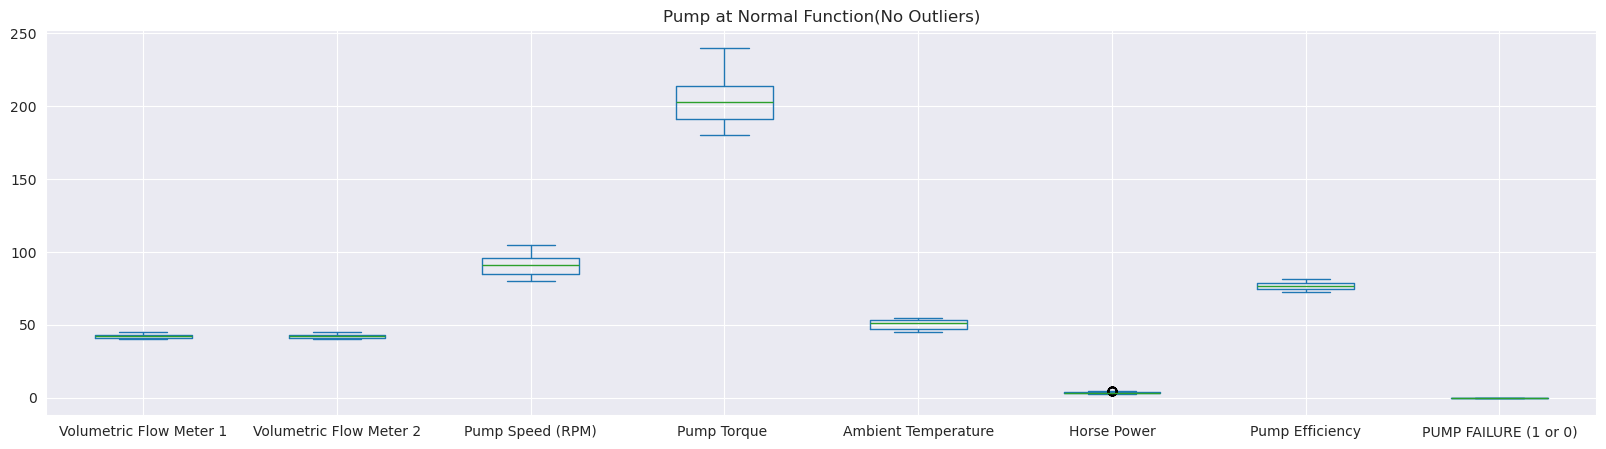

In [20]:
noutliers_normal_pump.plot(kind='box')
plt.title('Pump at Normal Function(No Outliers)')
plt.show()

### Boxplot: Pump at Failure 

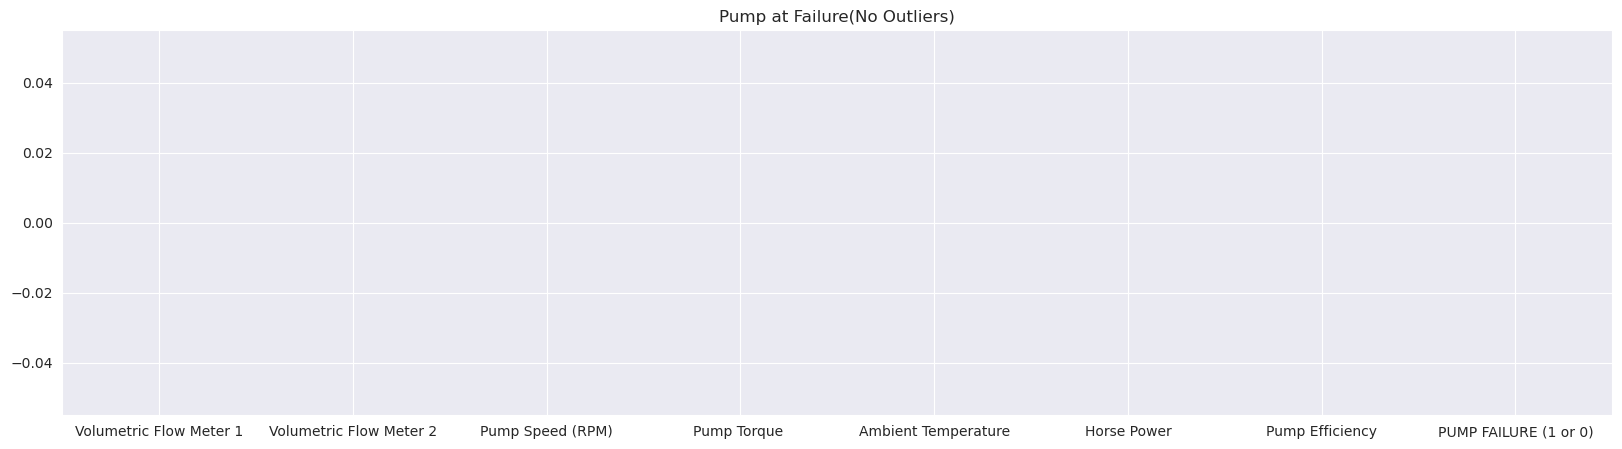

In [21]:
noutliers_fail_pump.plot(kind='box')
plt.title('Pump at Failure(No Outliers)')
plt.show()

<h3> <span style="color:orange"> 🛑 Please note that Step 8 and Step 9 are Challenge Questions and will <u>intentionally</u> be more difficult 🛑 </h3> 

## Step 8: <span style="color:green">Plot and Examine Each Column</span> 

As you might recall from the earlier plot you had made with the line plot; it was hard to see which variables were the most significant with respect to pump failure when all the variables are plotted together. This is common when variables are at different scales, the trends can be more challenging to interpret. This is why we are going to ITERATE through the dataframe and plot each individual variable out and compare this with the Pump Failure for a more streamlined analysis.

This will require you to make use of the following syntax:

1. Define a list variable called `ListOfVariables`; this is to contain the column names of all the **numerical** variables you wish to iterate through in the `dataframe_raw` dataset <p>

2. Instantiate your for loop with the following syntax: 
       
            for item in ListOfVariables:
            first_axis = dataframe[___].plot #We are looping through every item in the dataframe.
            second_axis = first_axis.twinx() #The Twinx function is used to ensure we share the X-Axis for both plots
            second_axis.plot(dataframe['ColumnOfInterest'], color='teal')
            plt.title(item)
            plt.show()
        
<b> i) Using the syntax provided, loop through the dataframe_raw dataset, plotting every variable individually, against the Pump Failure to better identify trends. </b>

**Note:** For each plot, ensure that you have a dual axis set up so you can see the Pump Failure (0 or 1) on the second Y-axis, and the attribute on the first Y-Axis. 

Check out this link to learn how to do this: https://matplotlib.org/gallery/api/two_scales.html


## Please put your code here

In [22]:
# set index to 'date' column for easwier identification of datestamps with an
dataframe_raw.set_index('TIMEFRAME (DD/MM/YYYY)', inplace=True)

### List of variables

In [23]:
#list_of_variables = dataframe_raw.select_dtypes(include='number').columns
list_of_variables = ['Volumetric Flow Meter 1',
       'Volumetric Flow Meter 2', 'Pump Speed (RPM)', 'Pump Torque ',
       'Ambient Temperature', 'Horse Power', 'Pump Efficiency']
print(list_of_variables)

['Volumetric Flow Meter 1', 'Volumetric Flow Meter 2', 'Pump Speed (RPM)', 'Pump Torque ', 'Ambient Temperature', 'Horse Power', 'Pump Efficiency']


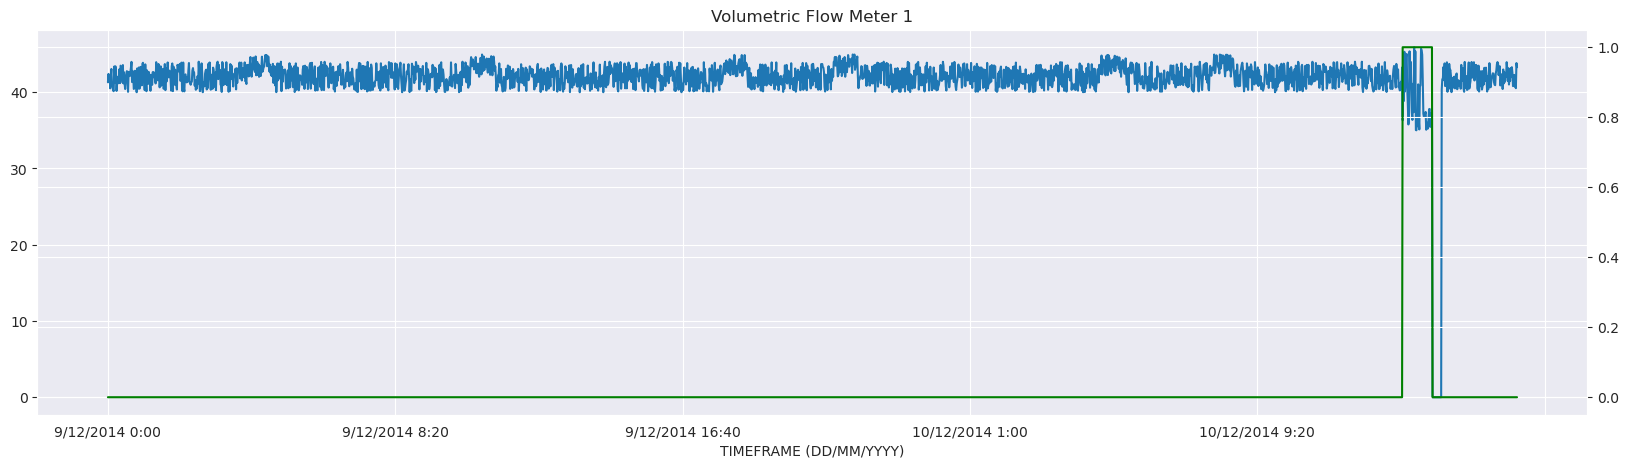

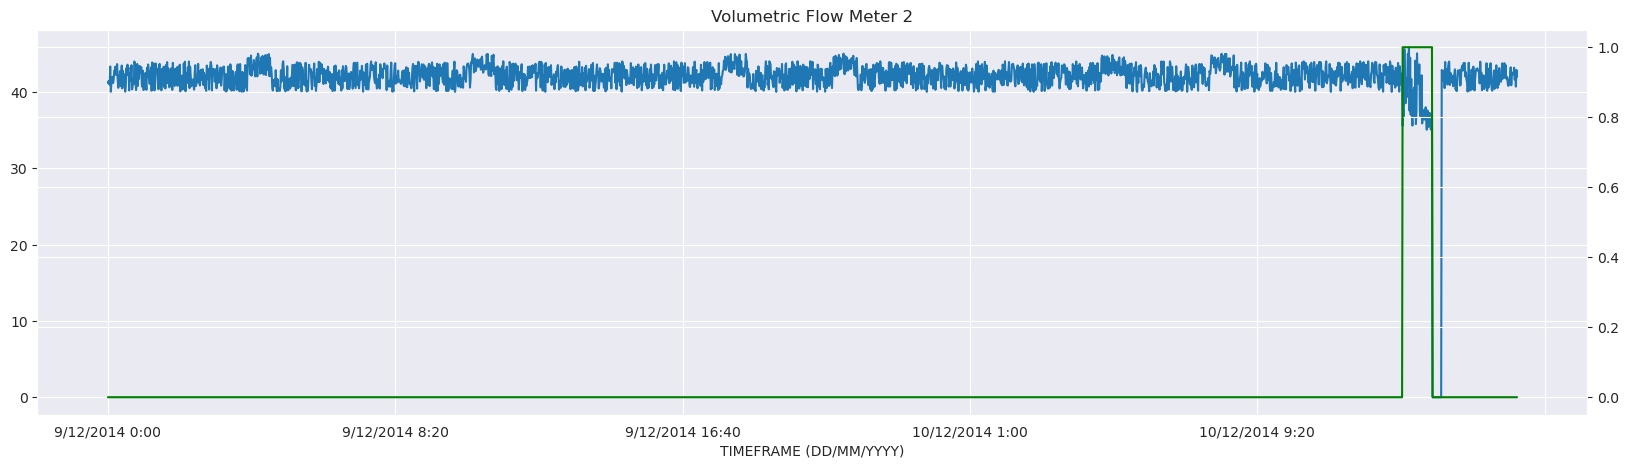

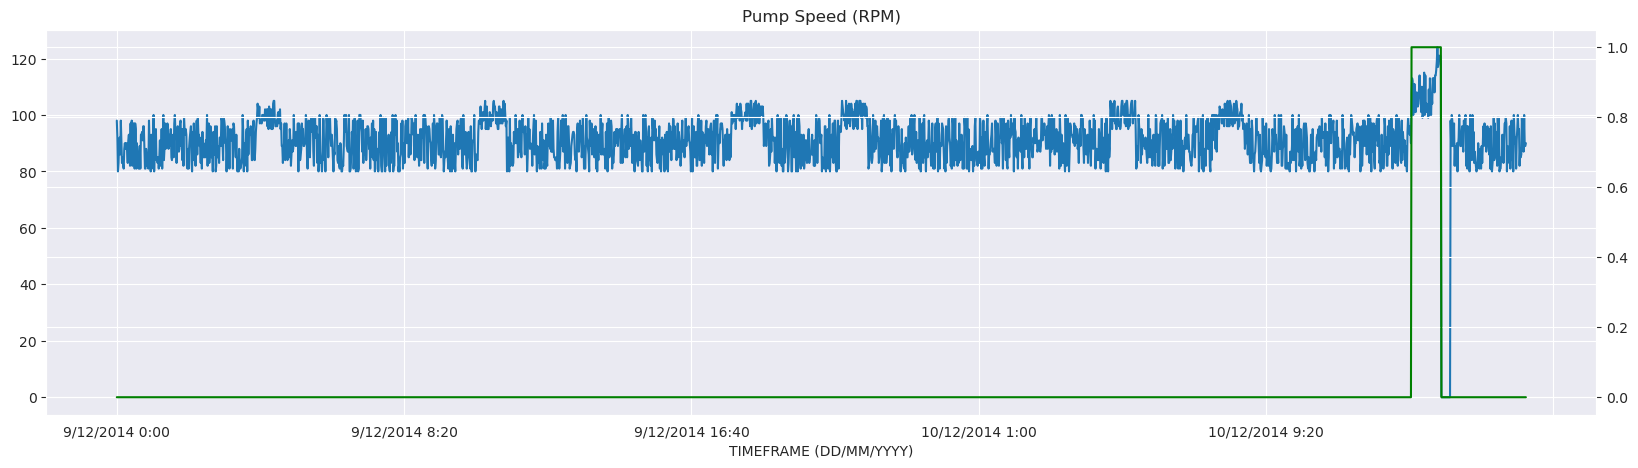

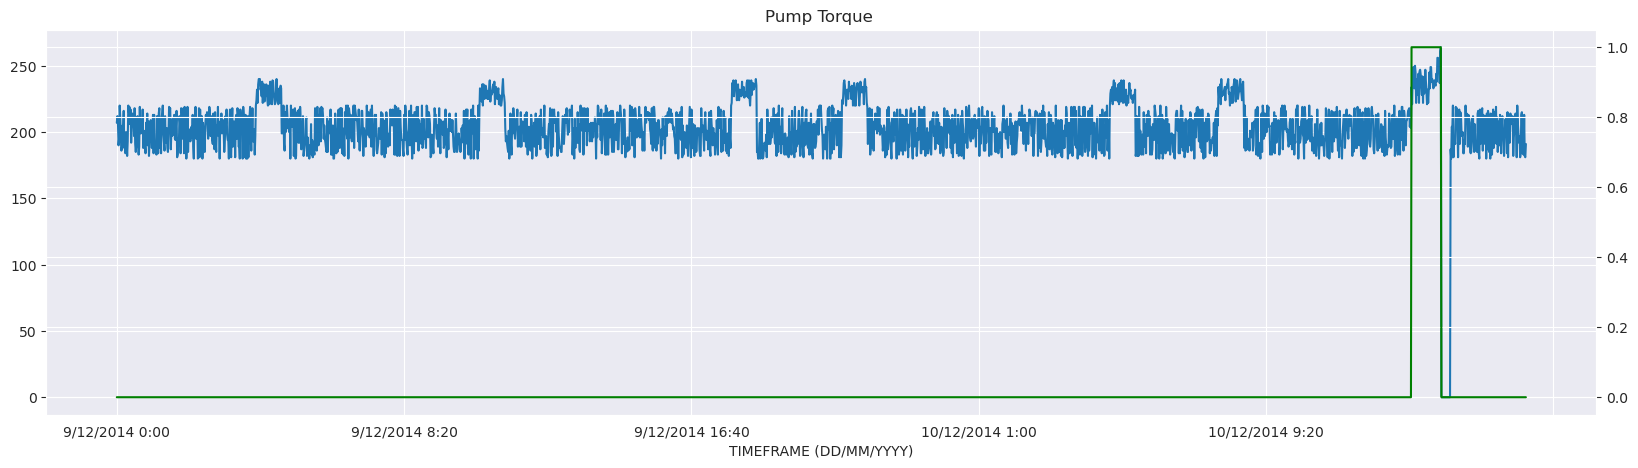

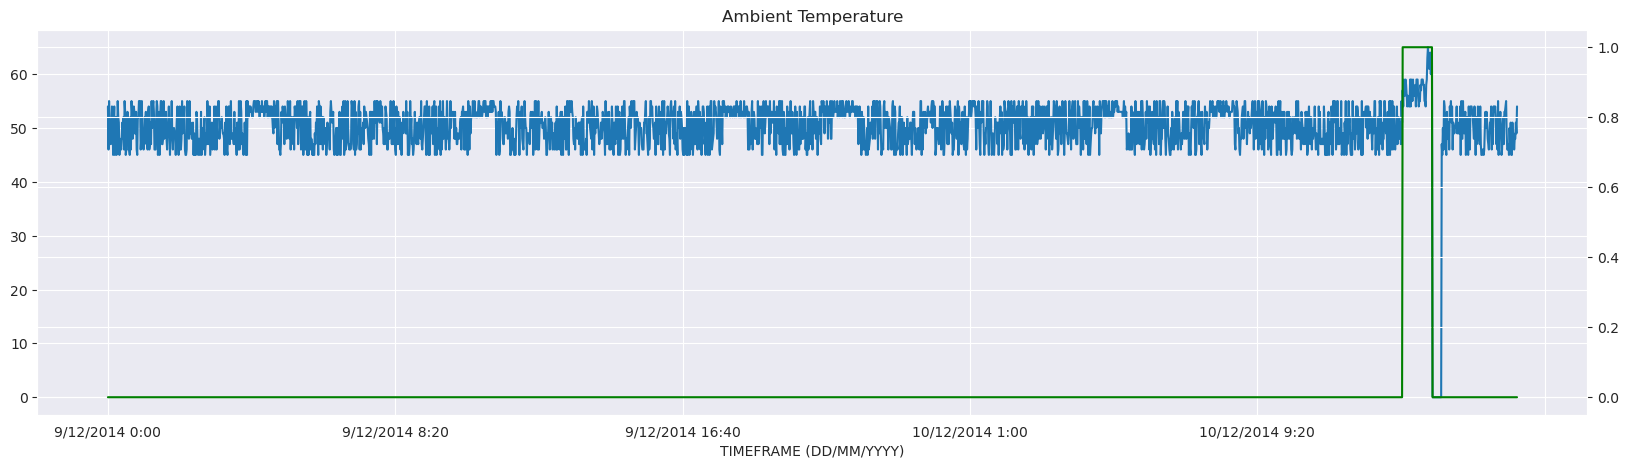

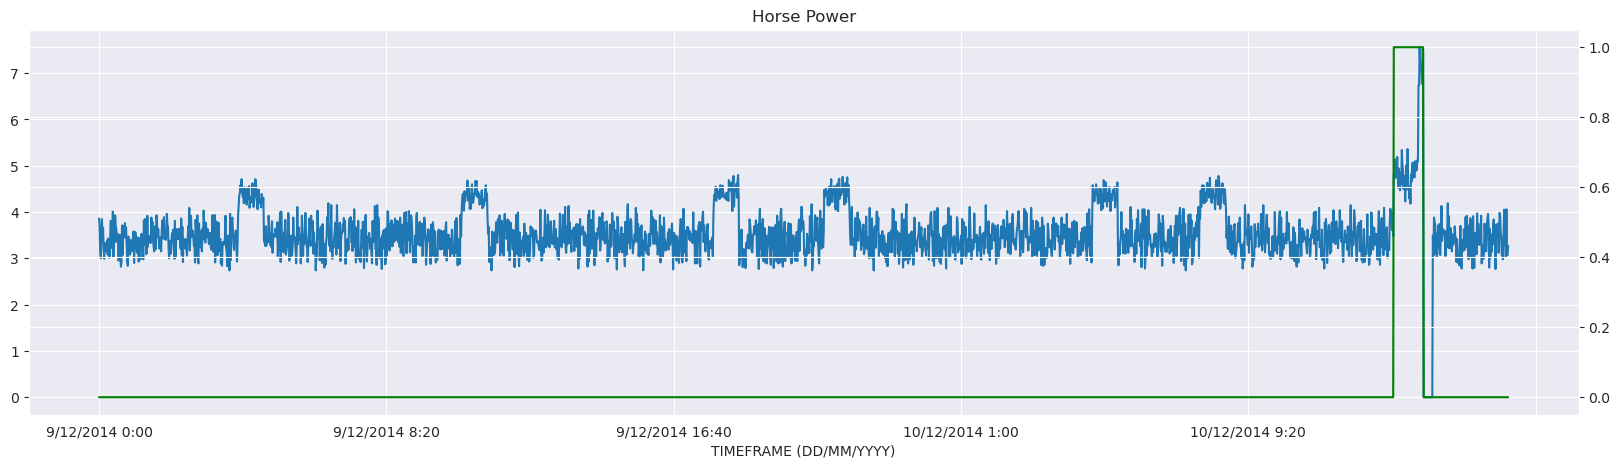

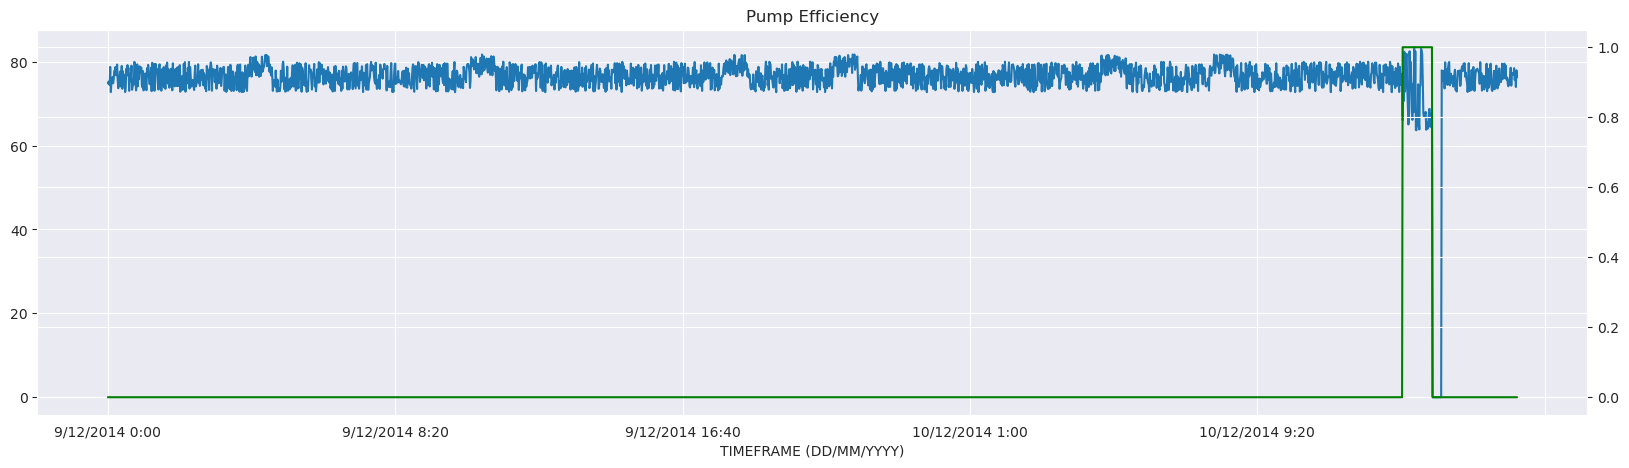

In [24]:
for i in list_of_variables:
    first_axis = dataframe_raw[i].plot()
    second_axis = first_axis.twinx()
    second_axis.plot(dataframe_raw['PUMP FAILURE (1 or 0)'], color='green')
    plt.title(i)
    plt.show()

<b> Have you noticed any particular trends when looking at the data in this way? Has it made it easier to see which variables *might* be reacting more strongly to the Pump Failure than others? </b> 

All variables seem to experience some sort of rise or dip at the moment of pump failure, most often at a level comparable to other interval peaks within the observed period, then hit dramtic minmiumums directly after these peak intervals.

A subset, however, interestingly hit an abnormally high value(compared to all other vomparables peaks in the target interval) followed immediately by an a drop to 0 (alone in the observed period). These variables, showing the most abnormmal values prior to the drops after pump failure, include: horse power, ambient temperature, pump speed, and pump torque with a comparatively smaller peak value.

Lastly, Pump Efficiency does not display a moinetary dramatic jump, but shows a steady decline below the observed dips in the interval observed, before it too hits 0 immediatly folllowing pump failure. 

<h3>  <span style="color:green">This is where we will switch to using the dataframe_stdev that you had previously defined in Q1, dataframe_stdev </span> </h3>

---

Now that we've iterated through the dataframe_raw, we're going to do a similar exercise but with the dataframe_stdev dataset.

In these next few exercises we'll be seeking to better understand how we make use of Pythons Powerful Inferential Statistics and Plotting libraries to Zoom In on periods of interest that we'd like to examinate further.

We'll first have you prepare the dataframe with the TIMEFRAME (DD/MM/YYYY) column set as the index.

You might ask; What is an Index?

An **index** is used as a unique identifier for each record in the dataset. This is used primarily for JOINING operations (think SQL joins), or in our case, for filtering on a specific time period.

You'll be making use of the following function:

    dataframe.set_index('someColumn', inplace=True)

For an example of how this works, click <a href = https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html> here </a>:


## Step 9: <span style="color:green">Create a Plot for Pump Failures Over a Rolling Time Period</span> 

i) Set the **index of the dataframe_stdev** dataset to the TIMEFRAME (DD/MM/YYYY) attribute.

ii) Using the List_Of_Variables you created in Step 8, Re-plot all the numerical variables in the dataframe_stdev for the following time periods:
     10/12/2014 12:00 to 10/12/2014 14:30.

Please ensure you set the secondary axes as the Pump Failure Variable so you can observe how the variables move with respect to Pump Failure. 

    for item in ListOfVariables:
        first_axis = dataframe[___].plot() #We are looping through every item in the dataframe.
        first_axis.xaxis.set_major_locator(plt.MaxNLocator(10)) #This will ensure we only plot a maximum of 10 Time Stamps
        second_axis = first_axis.twinx() #The Twinx function is used to ensure we share the X-Axis for both plots
        second_axis.plot(dataframe['ColumnOfInterest'], color='orange')
        second_axis.xaxis.set_major_locator(plt.MaxNLocator(10))
        plt.title(item)
        plt.show()

<b>Note: To filter on the time period you will need to make use of the below syntax which *should* be familiar to you as you are subsetting your dataframe, but instead of on a column, you're subsetting a time period. </b>

    dataframe_time_filtered = dataframe[(dataframe.index >= "_____") & (dataframe.index <= "_____")]


## Please put your code here

### Dataframe Filtered by specific dates 

In [25]:
dataframe_stdev.reset_index(inplace=True)
dataframe_stdev.set_index('TIMEFRAME (DD/MM/YYYY)', inplace=True)

In [26]:
dataframe_time_filtered = dataframe_stdev[(dataframe_stdev.index>= "10/12/2014 12:00") & (dataframe_stdev.index<="10/12/2014 14:30")]
#print(dataframe_time_filtered.head())

In [27]:
print(list_of_variables)

['Volumetric Flow Meter 1', 'Volumetric Flow Meter 2', 'Pump Speed (RPM)', 'Pump Torque ', 'Ambient Temperature', 'Horse Power', 'Pump Efficiency']


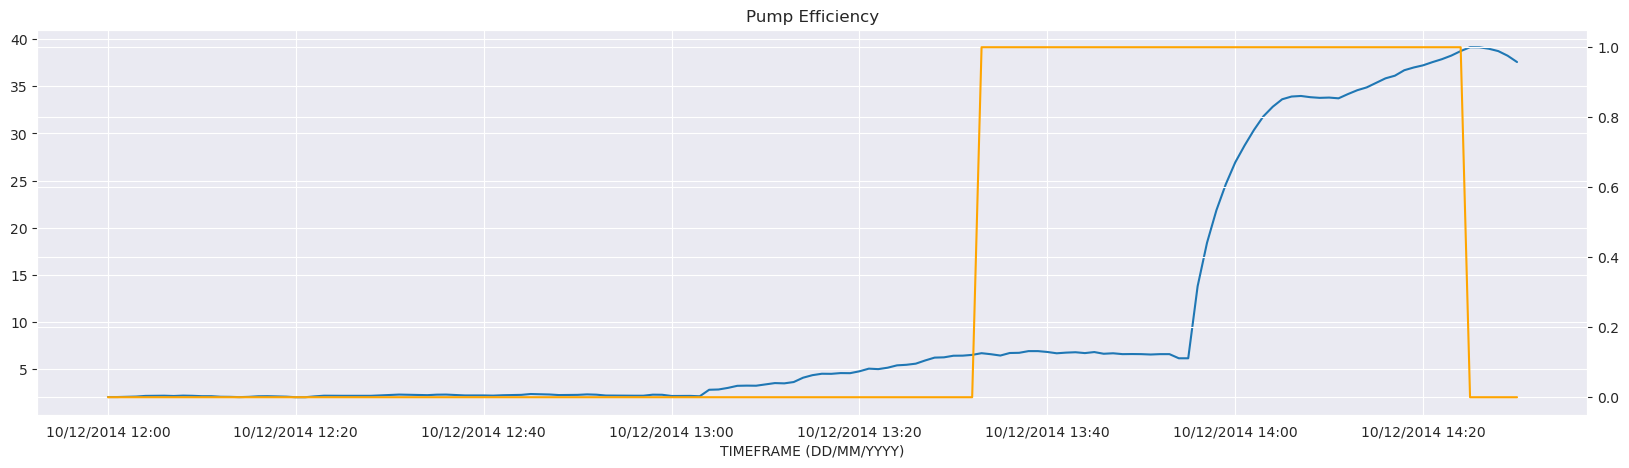

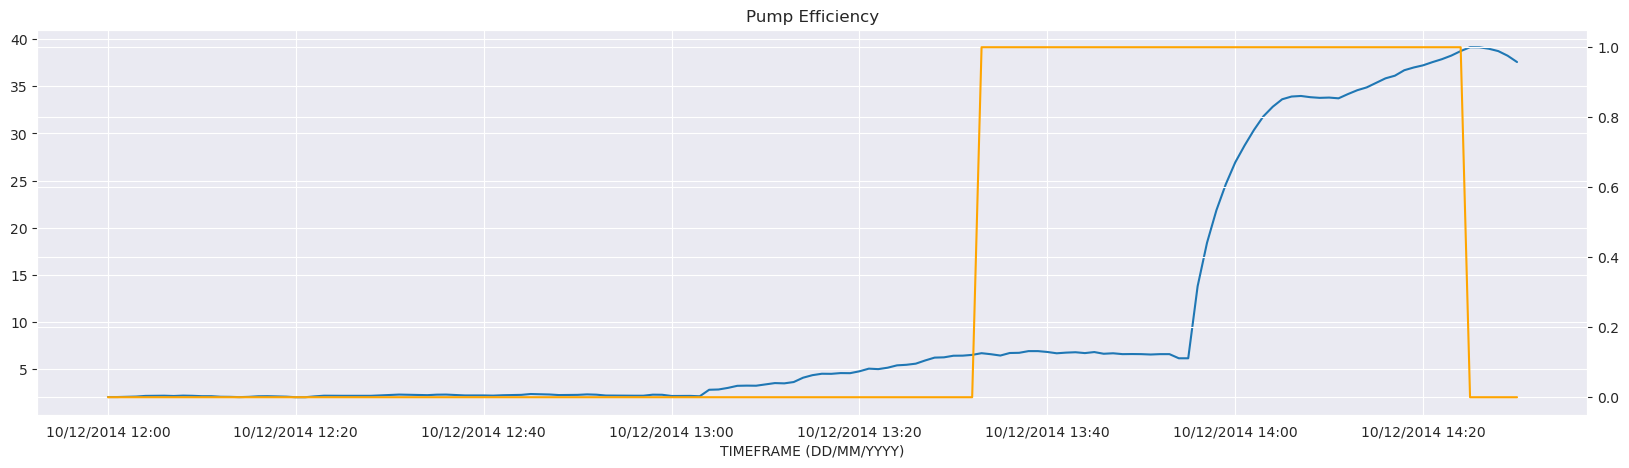

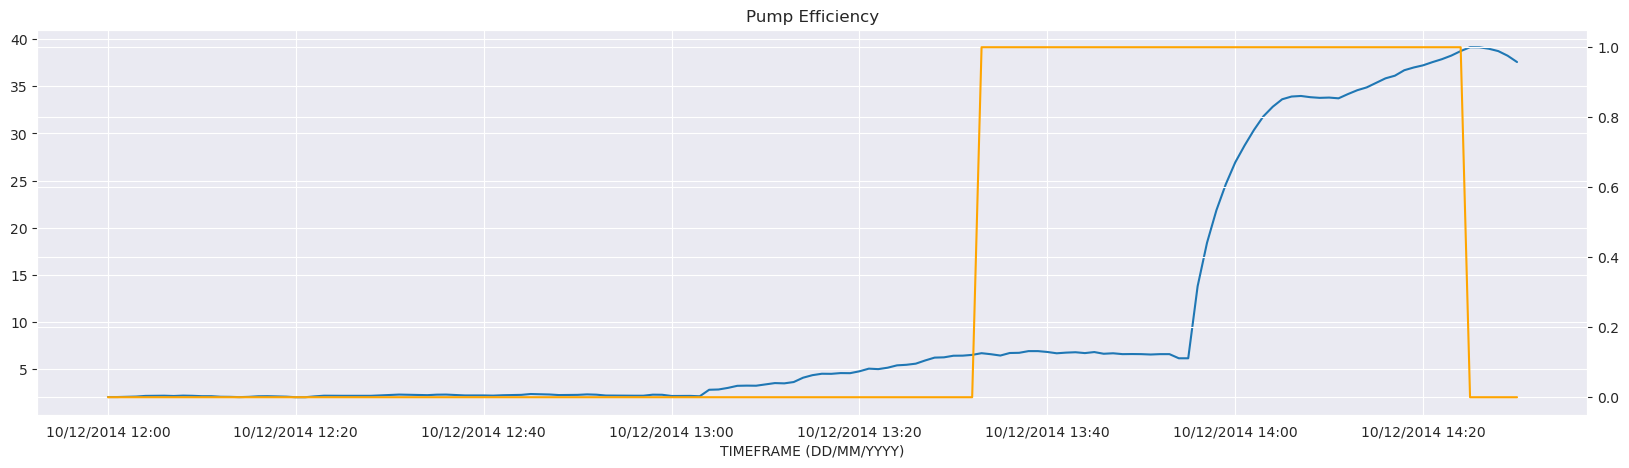

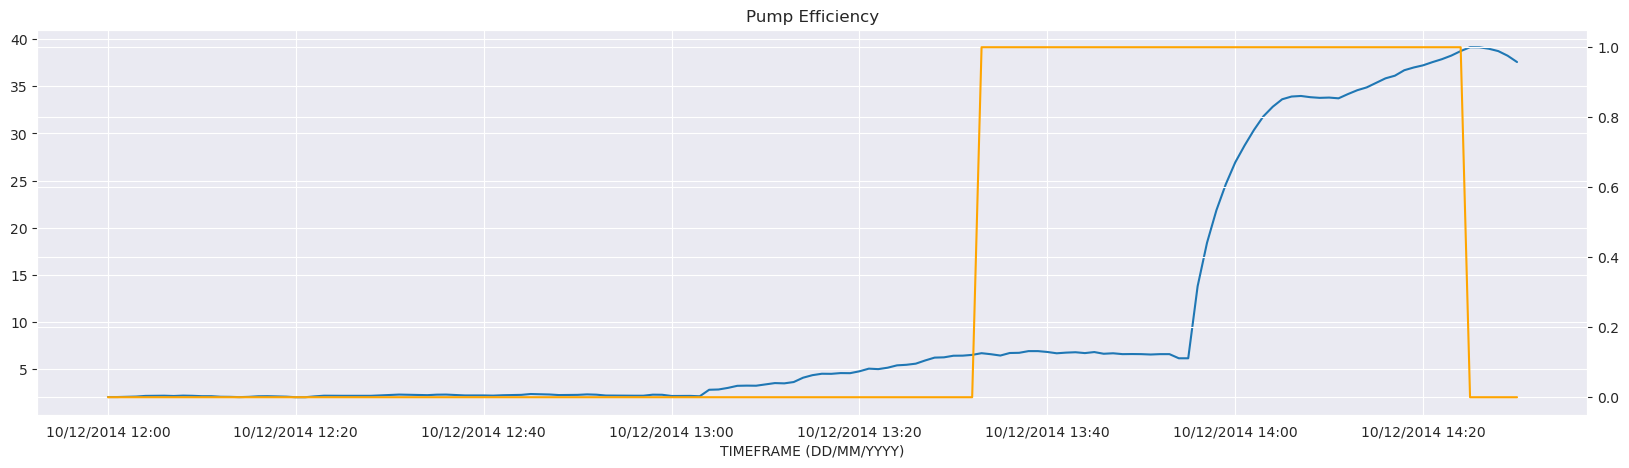

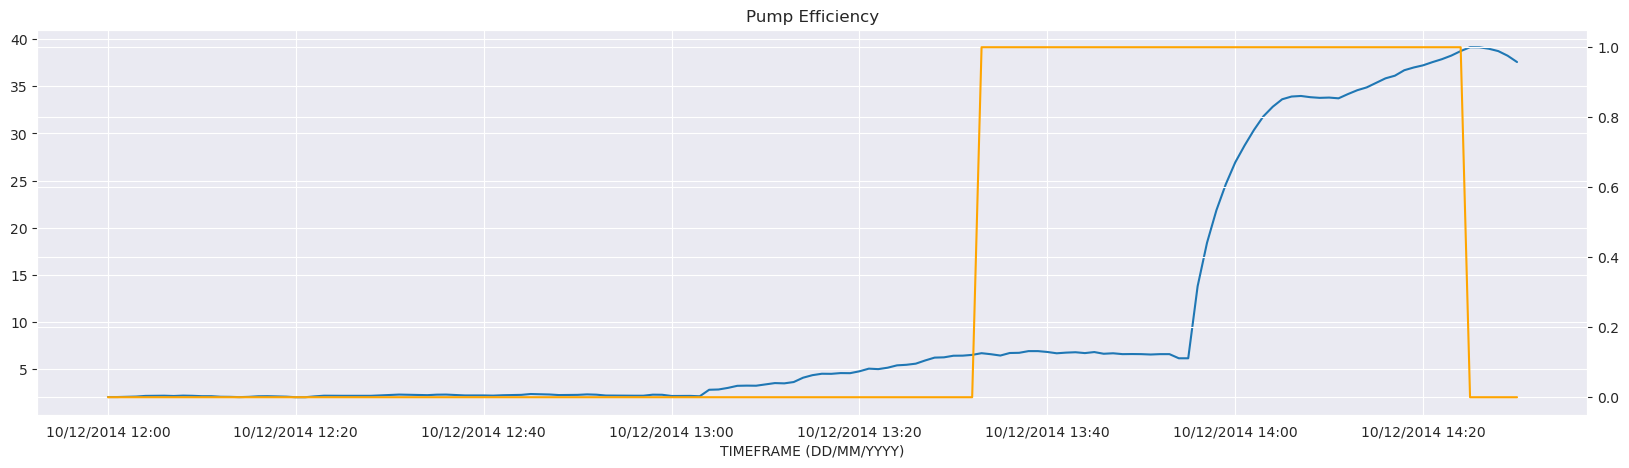

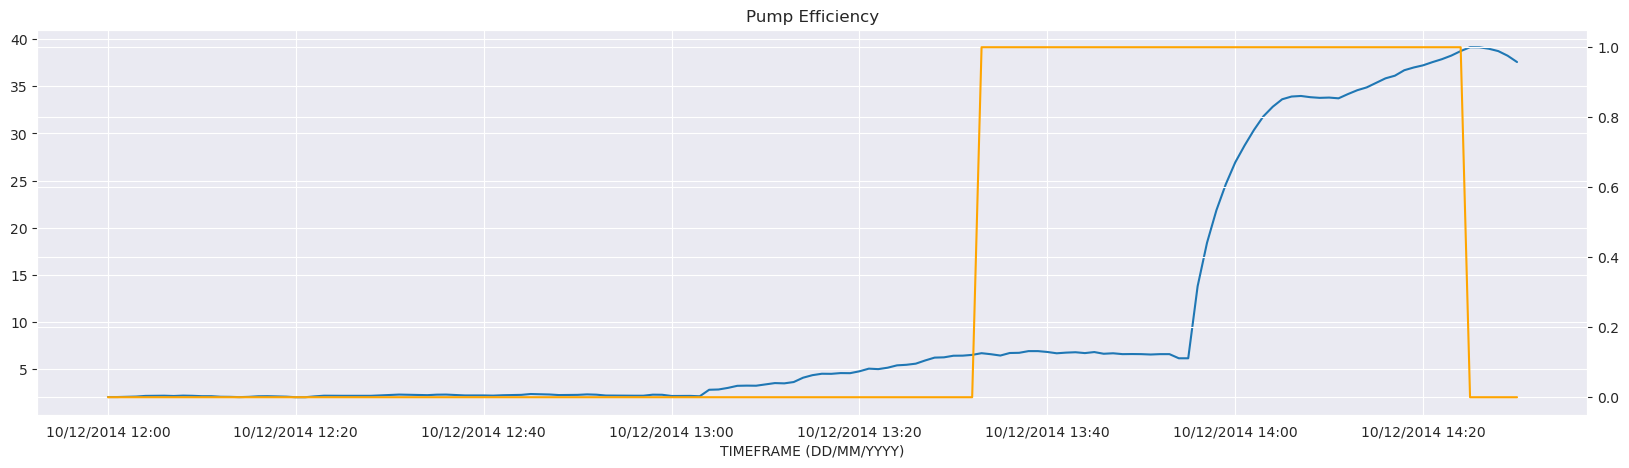

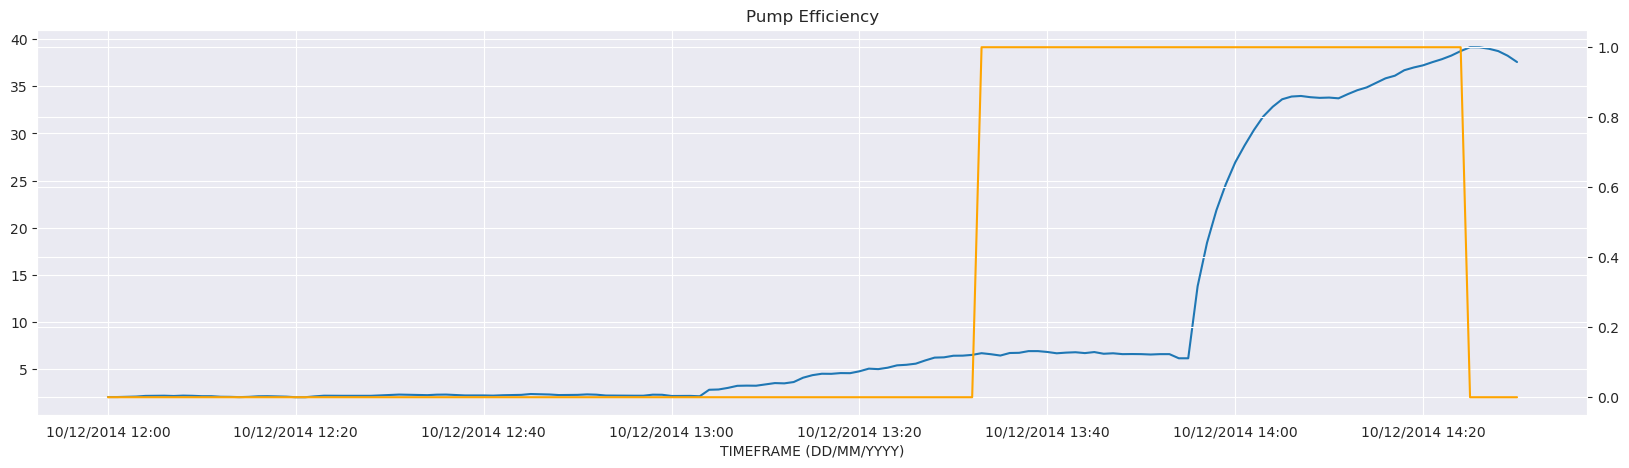

In [28]:
for item in list_of_variables:
        first_axis = dataframe_time_filtered[i].plot() #We are looping through every item in the dataframe.
        first_axis.xaxis.set_major_locator(plt.MaxNLocator(10)) #This will ensure we only plot a maximum of 10 Time Stamps
        second_axis = first_axis.twinx() #The Twinx function is used to ensure we share the X-Axis for both plots
        second_axis.plot(dataframe_time_filtered['PUMP FAILURE (1 or 0)'], color='orange')
        second_axis.xaxis.set_major_locator(plt.MaxNLocator(10))
        plt.title(i)
        plt.show()

<h4> The output from your code should display image(s) like the one shown below </h4>

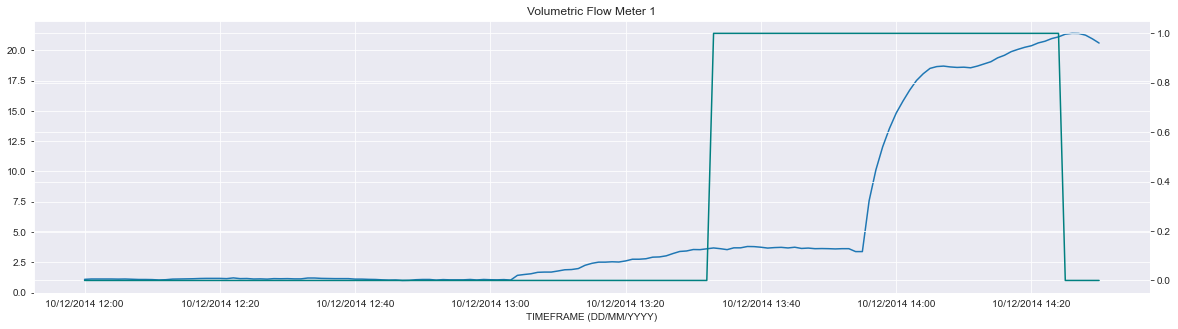

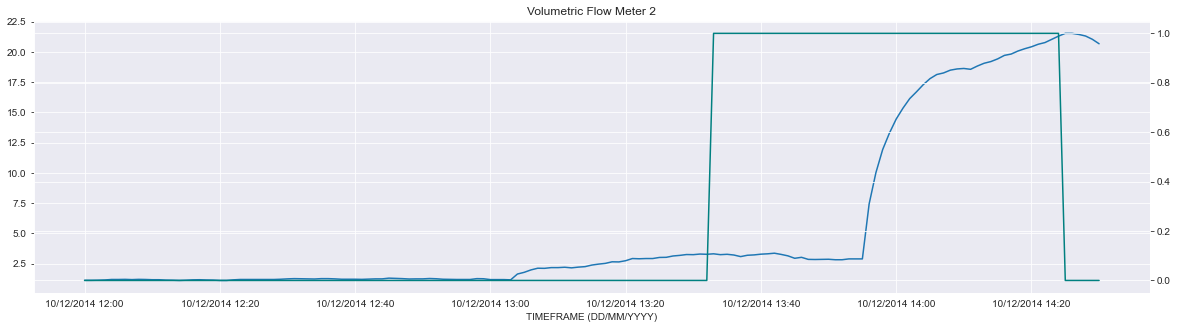

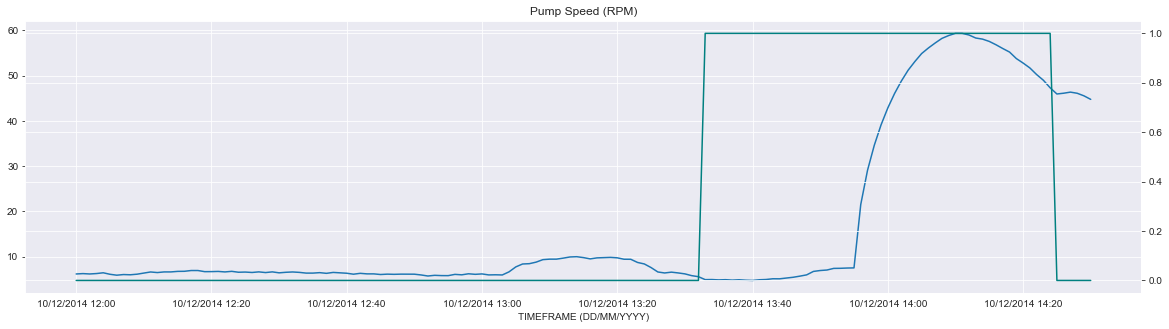

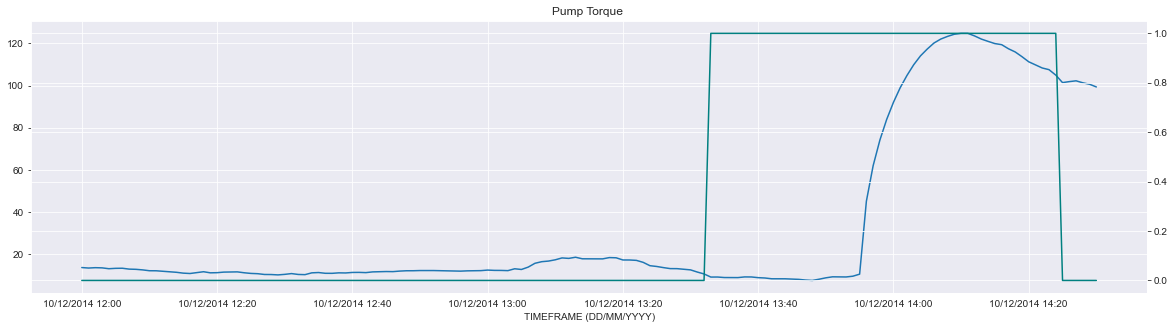

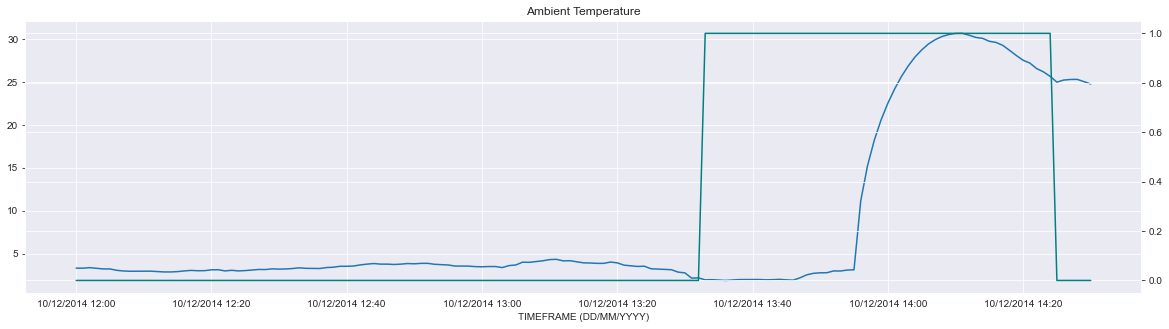

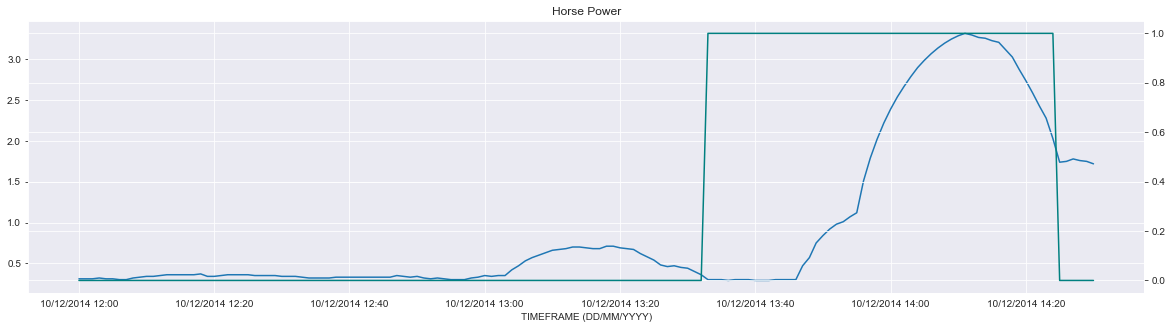

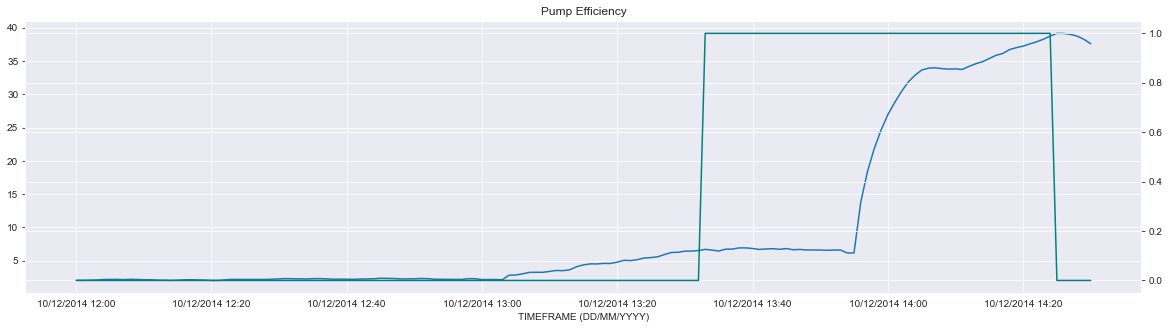

---

# Part II: <span style="color:green">Inferential Statistical Analysis</span>

When you performed inferential statistics for Southern Water Corp using Excel, you made use of the data analysis package to create a heatmap using the correlation function. The heatmap showed the attributes that strongly correlated to Pump Failure. 

Now, you'll create a heatmap using Seaborn's heatmap function — another testament to the fact that having Matplotlib and Seaborn in your toolbox will allow you to quickly create beautiful graphics that provide key insights. 

## Step 10: <span style="color:purple">Create a Heatmap</span> 
i) Using Seaborn's heatmap function, create a heatmap that clearly shows the correlations (R) for all variables using the dataframe_raw dataset.

The syntax of Seaborn takes the following arguments:

<a href = https://seaborn.pydata.org/generated/seaborn.heatmap.html> sns.heatmap(correlated_dataframe, annot=True) </a>

You'll need to ensure you use the following <a href = https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html>.corr() </a>  function and apply this to your dataframe first, <b> before </b> passing this to the sns.heatmap() function.

### Please put your code here

#### We've included an example of what the output *may* look like below

In [29]:
# Creating correlation dataframe with only numeric columns
dataframe_raw_correlation = dataframe_raw.select_dtypes(include='number').corr()

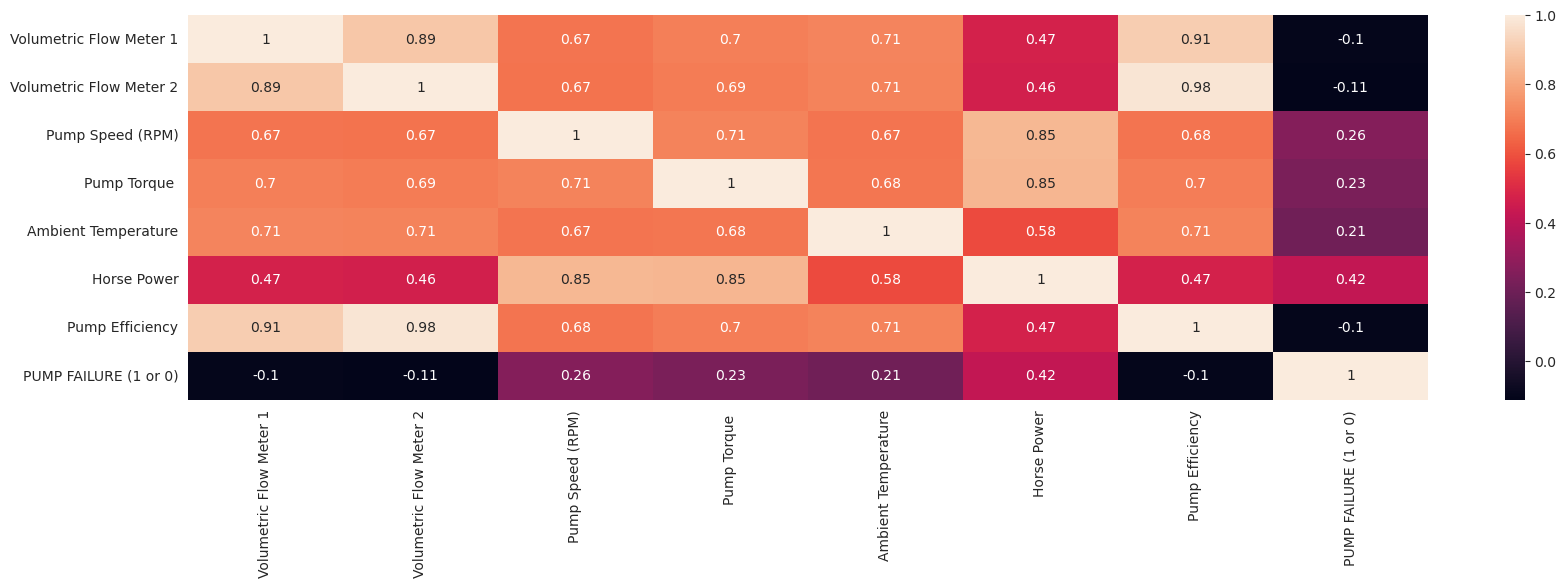

In [30]:
sns.heatmap(dataframe_raw_correlation, annot=True)
plt.show('Pump Failure Correlation Heatmap- Raw Values')

**Which variables seem to correlate with Pump Failure?**


In [31]:
print('Horse Power shows moderate correlation with Pump Failure at 0.42')

Horse Power shows moderate correlation with Pump Failure at 0.42



### Step 11: <span style="color:purple">Create a Barplot of Correlated Features</span>
<b> i) Using the correlated dataframe you've created earlier, create a barplot that shows the correlated features against PUMP FAILURE (1 or 0), in descending order. </b>

You'll have to think carefully regarding this question.

You'd know that you can get the correlation values from the following command:

    dataframe.corr()
    
Upon printing this out, you should get a **dataframe** that looks like the below:


In [32]:
print(dataframe_raw_correlation.sort_values(ascending=False, by='PUMP FAILURE (1 or 0)'))

                         Volumetric Flow Meter 1  Volumetric Flow Meter 2  \
PUMP FAILURE (1 or 0)                  -0.102508                -0.112115   
Horse Power                             0.470081                 0.462087   
Pump Speed (RPM)                        0.674691                 0.671896   
Pump Torque                             0.700425                 0.692183   
Ambient Temperature                     0.713913                 0.710423   
Volumetric Flow Meter 1                 1.000000                 0.893058   
Pump Efficiency                         0.913014                 0.980144   
Volumetric Flow Meter 2                 0.893058                 1.000000   

                         Pump Speed (RPM)  Pump Torque   Ambient Temperature  \
PUMP FAILURE (1 or 0)            0.260016      0.233193             0.207946   
Horse Power                      0.848416      0.847884             0.579374   
Pump Speed (RPM)                 1.000000      0.711037           

In [34]:
# isolating target variable- PUMP FAILURE (1 or 0)
correlation_pump_fail_raw = dataframe_raw_correlation['PUMP FAILURE (1 or 0)'].sort_values(ascending=False)
print(correlation_pump_fail_raw)

PUMP FAILURE (1 or 0)      1.000000
Horse Power                0.421694
Pump Speed (RPM)           0.260016
Pump Torque                0.233193
Ambient Temperature        0.207946
Volumetric Flow Meter 1   -0.102508
Pump Efficiency           -0.102696
Volumetric Flow Meter 2   -0.112115
Name: PUMP FAILURE (1 or 0), dtype: float64


You might think to yourself this looks **suspiciously like a dataframe with columns that you can manipulate**.

This is indeed the case. 

With this hint in mind, you should be able to **select the relevant column of interest and combine this with the .plot(kind='__') function to answer the question**. Don't forget to think about .sort_values() to help sort your data!

### Please put your code here

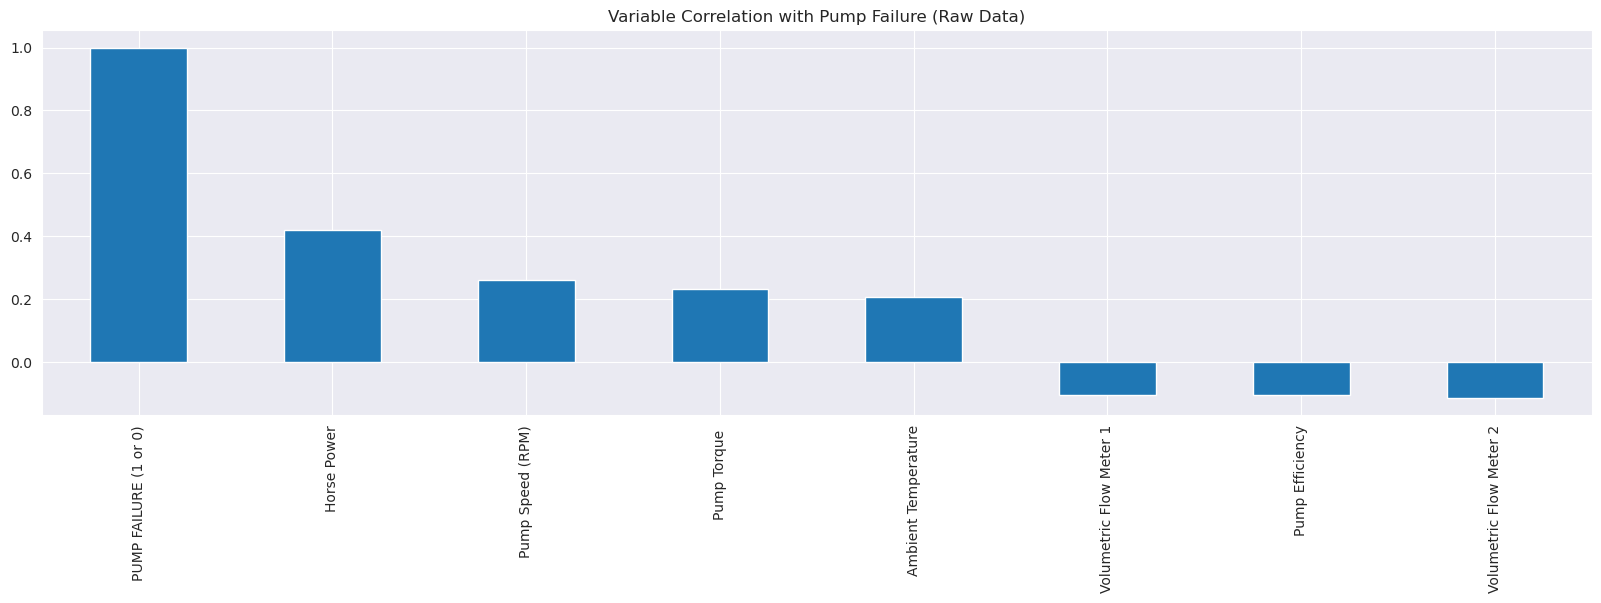

In [35]:
correlation_pump_fail_raw.plot(kind='bar')
plt.title('Variable Correlation with Pump Failure (Raw Data)')
plt.show()

---

### Step 12: <span style="color:purple">Create a Rolling Standard Deviation Heatmap</span> 
Previously, you created a correlation matrix using 'raw' variables. We saw *some* correlations with the raw data but they weren't necessarily as strong as we would have liked. This time, we'll recreate a Heatmap using the dataframe_stdev dataset you had imported in Step Two. 

<b> i) Using Seaborn's heatmap function, create a heatmap that clearly shows the correlations (including R) for all variables using the dataframe_stdev dataset. </b>


## Please put your code here

In [36]:
dataframe_stdev_correlation = dataframe_stdev.select_dtypes(include='number').corr()


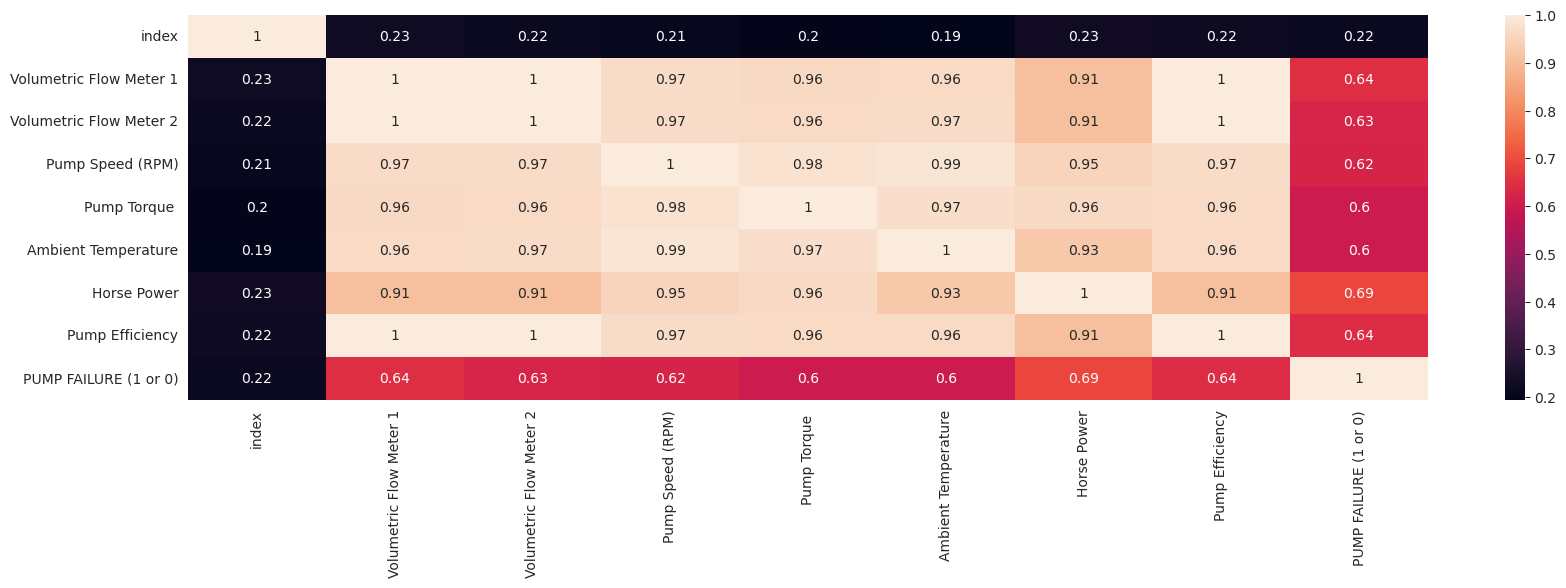

In [37]:
sns.heatmap(dataframe_stdev_correlation, annot=True)
plt.show('Pump Failure Correlation Heatmap- Standard Deviation Values')

<b> Do any variables stand out? If yes, list these out below your heatmap. </b>

All variable correleations along Pump failure have correlations greater than or equal to .6, showing a moderately high positive correlation accross the board. The highest correlation remains 'Horse Power' at .69 followed by 'Voolumetric Flow Meter 1' and 'Pump Eficiency', both at .64.

### Creating a Multivariate Regression Model


When you worked on this case study in Excel, you went through the tricky process of using the rolling standard deviation variables to generate a regression equation. Happily, this process is much simpler in Python.  

For this step, you'll be using the statsmodel.api library you imported earlier and calling the Ordinary Least Squares Regression to create a multivariate regression model (which is a linear regression model with more than one independent variable).

## Step 13: <span style="color:purple">Use OLS Regression</span> 
<b> i) Using the OLS Regression Model in the statsmodel.api library, create a regression equation that models the Pump Failure (Y-Variable) against all your independent variables in the dataframe_raw dataset. </b>

In order to fit a linear regression model with statsmodels.api there are a few steps that need to be taken. We have demonstrated this below:

<b> Don't forget to reimport the dataframes you've previously imported in Step 2 before starting these steps </b> 

    1. Establish two dataframes named, independent_variables and dependent_variables. The independent variables are known as explanatory variables - they help EXPLAIN what you are trying to model. Dependent Variable on the other hand is the variable of interest that you want to MODEL. In this case, the Dependent Variable is Pump Failure (1 or 0).
    
    2. Add a constant to your Independent Dataframe via the following syntax:
    independent_variables = sm.add_constant(independent_variables). This will simply add a constant stream of 1's in a column to your dataframe. This constant is used to account for bias in the model.  
    
    3. Store and Fit your model with the below syntax:
    regression_model = sm.OLS(dependent_variable,independent_variable).fit() 
    
    4. Print the regression_model.summary() to view the Regression Statistics 


<b> ii) Repeat i) but this time use the dataframe_stdev you imported previously.</b>

You will repeat the same steps as you have done in i) only you will be changing the dataset from dataset_raw to dataset_stdev. 


## Please put your code here 

### Multivariate Regression Model: Dataframe Raw

In [ ]:
# Dataframe_Raw vars
independent_variables_raw = dataframe_raw[list_of_variables]
dependent_variables_raw = dataframe_raw['PUMP FAILURE (1 or 0)']

In [40]:
# model
regression_model = sm.OLS(dependent_variables_raw,independent_variables_raw).fit()
regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared (uncentered):                   0.371
Model:                               OLS   Adj. R-squared (uncentered):              0.369
Method:                    Least Squares   F-statistic:                              206.1
Date:                   Wed, 02 Apr 2025   Prob (F-statistic):                   7.29e-241
Time:                           10:54:35   Log-Likelihood:                          1814.7
No. Observations:                   2453   AIC:                                     -3615.
Df Residuals:                       2446   BIC:                                     -3575.
Df Model:                              7                                                  
Covariance Type:               nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Volumetric Flow Meter 1    -0.0139      0.002     -7.666      0.000      -0.017      -0.010
Volumetric Flow Meter 2    -0.0178      0.003     -5.302      0.000      -0.024      -0.011
Pump Speed (RPM)            0.0027      0.001      3.305      0.001       0.001       0.004
Pump Torque                 0.0009      0.000      2.444      0.015       0.000       0.002
Ambient Temperature         0.0102      0.001     14.464      0.000       0.009       0.012
Horse Power                 0.0701      0.019      3.746      0.000       0.033       0.107
Pump Efficiency             0.0020      0.002      1.010      0.313      -0.002       0.006
==============================================================================
Omnibus:                     2053.340   Durbin-Watson:                   0.457
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            56905.683
Skew:                           3.886   Prob(JB):                         0.00
Kurtosis:                      25.279   Cond. No.                     2.00e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large,  2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Multivariate Regression Model: Dataframe_Stdev

In [41]:
#Dataframe_Stdev vars
independent_variables_std = dataframe_stdev[list_of_variables]
dependent_variables_std = dataframe_stdev['PUMP FAILURE (1 or 0)']

In [ ]:
regression_model_std = sm.OLS(dependent_variables_std, independent_variables_std).fit()
regression_model_std.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared (uncentered):                   0.774
Model:                               OLS   Adj. R-squared (uncentered):              0.773
Method:                    Least Squares   F-statistic:                              1195.
Date:                   Wed, 02 Apr 2025   Prob (F-statistic):                        0.00
Time:                           10:56:55   Log-Likelihood:                          3067.8
No. Observations:                   2452   AIC:                                     -6122.
Df Residuals:                       2445   BIC:                                     -6081.
Df Model:                              7                                                  
Covariance Type:               nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Volumetric Flow Meter 1     0.0650      0.010      6.414      0.000       0.045       0.085
Volumetric Flow Meter 2    -0.5695      0.020    -28.477      0.000      -0.609      -0.530
Pump Speed (RPM)           -0.0235      0.002    -12.253      0.000      -0.027      -0.020
Pump Torque                -0.0209      0.001    -25.204      0.000      -0.023      -0.019
Ambient Temperature         0.0153      0.003      4.877      0.000       0.009       0.021
Horse Power                 0.7928      0.022     35.982      0.000       0.750       0.836
Pump Efficiency             0.3243      0.012     26.478      0.000       0.300       0.348
==============================================================================
Omnibus:                      981.646   Durbin-Watson:                   0.234
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47251.698
Skew:                           1.134   Prob(JB):                         0.00
Kurtosis:                      24.386   Cond. No.                         418.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h4> <b> Compare the Models you've created and observe the R Squared displayed for each model - which model seems better and why? Put your thoughts down below.  </b> If you're not sure how to answer this, you should reference the resource <a href = https://blog.minitab.com/en/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit> here </a> for a more detailed explanation.



The Dataframe_std OLS seems to be a much better fit. The  Ajusted R Squared values here (.77) suggest a strong model fit, where a significant proportion of variance in pump failure can be explaioned by the independent vartiable sin the model. In contrast, the OLS for Datframe_raw outputs an R Squared of .37- suggesting that this variation in pump failure is not significantly explained by the model.

Mopreover, the correlation coefficinent in individual independent variables is also more revealing in the Datframe_Stdev OLS, showing significant magnitudes in the variable correaltions to pump failures: horse power (.79), Volumetric Flow Meter 2 (-.57), and a smaller but notable .32 for pump efficiency. 

The reason for the superiority of the Dataframe_std model is that while the raw data model is plotting raw values and caluculating the residuals as such, the Dataframe_std values uses the standard deviation of these values, thereby taking the squarere root of the variance of each data point. This model altertaioon minimizes the total distance from each point to the regression line- tehrefore reducing the proportion of variance between pump failure and the independent variables in the model. 

## Step 14: <span style="color:purple">Analysis of Coefficients </span>

Great job creating those regressive equations! You've reached the final two steps of this case study!

We've now identified that *one* of our regressive models has a better fit than the previous model.

Using this model, we want to **extract** the co-efficients to better understand the variables that display the largest *absolute* rate of change with respect to Pump Failure. We'll use the co-efficients to better assess this from an *absolute* rate of change perspective. (i.e. Which variables spike the most in relation to Pump Failure?)

<b> i) Using the .params method, extract the Coefficients from your regression_model and create a bar plot that identifies which coefficients react most strongly with respect to Pump Failure. Which three (3) variables seem to showcase the
strongest 'relationship' with respect to Pump Failure? </b>

You can use params via the following syntax:

    model.params where model represents the name of the regression model you've created.

We've included an example below that showcases what your chart should look like upon completion of this exercise. 



### Please put your code here

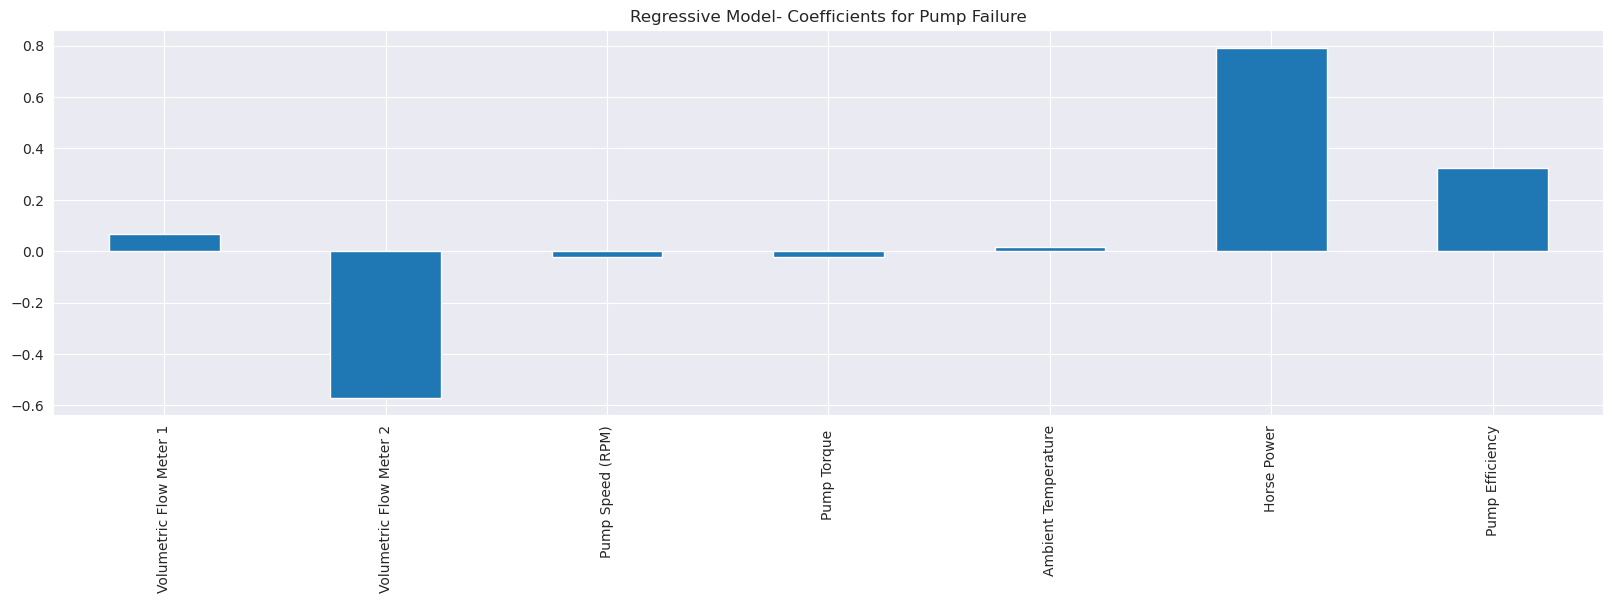

In [44]:
regression_model_std.params.plot(kind='bar')
plt.title('Regressive Model- Coefficients for Pump Failure')
plt.show()

<h3> <span style="color:orange"> Please note that Step 15 is a Challenge Questions and will intentionally be more difficult </h3> 


## Step 15: <span style="color:purple">Validate Predictions</span> 

Now it's time for us to <b> validate our predictions. </b>
    
Once you've created a regressive_model, you can call this using the following syntax:

        regressive_model.predict(independent_variables). 
        
Extra information regarding how this works can be found <a href = https://www.statsmodels.org/stable/examples/notebooks/generated/predict.html> here </a>

<b> 
i) Create a new column in the dataframe_stdev, called, 'Prediction'. 
    
ii) Use the regression equation you created in the previous step and apply the .predict() function to the independent variables in the dataframe_stdev dataset so you get a column full of your regressive predictions.
    
iii) Create a Dual-Axis Plot with the following axes items: <p>
    
        Axes One would contain: Volumetric Flow Meter 2, Pump Efficiency and Horse Power 
        Axes two would contain: Pump Failure (1 or 0) and Prediction
</b>


**Note:** Don't forget how to use .twinx() to help you out with the dual axis!

We've included an example below of how your chart might look once you're done!

### Please put your code here

In [65]:
dataframe_stdev['Prediction'] = regression_model_std.predict(independent_variables_std)
axis_1 = dataframe_stdev[['Volumetric Flow Meter 2', 'Pump Efficiency', 'Horse Power']]
axis_2 = dataframe_stdev[['PUMP FAILURE (1 or 0)', 'Prediction']]


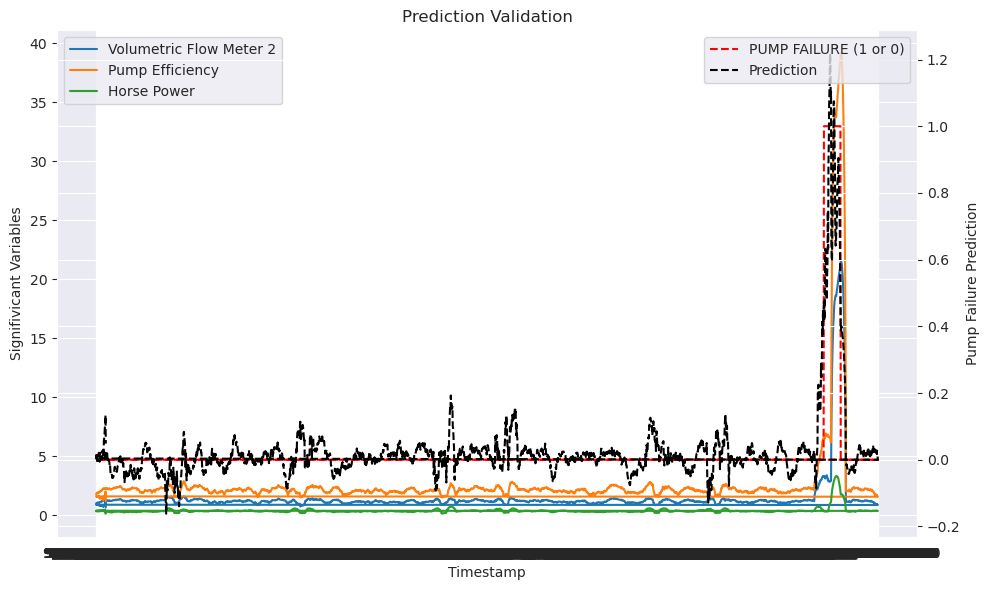

In [ ]:

# Creating the figure and primary axis
plt.figure(figsize=(10, 6))
# Get current axis
ax1 = plt.gca()  

# looping through the columns of axis_1
for column in axis_1.columns:
    ax1.plot(dataframe_stdev.index, axis_1[column], label=column)

# Setting primary axis labels and legend
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Signifivicant Variables')
ax1.legend(loc='upper left')

# Creating secondary axis
ax2 = ax1.twinx()

# Plotting the secondary axis with different colors and looping through defined columns
colors = ['red', 'black']  
for column, color in zip(axis_2.columns, colors):
    ax2.plot(dataframe_stdev.index, axis_2[column], label=column, linestyle='--', color=color)

# Setting secondary axis labels and legend
ax2.set_ylabel('Pump Failure Prediction')
ax2.legend(loc='upper right')

plt.title('Prediction Validation')
plt.grid(True)
plt.tight_layout()
plt.show()


<h3> You've made it to the end of this challenging case study — well done! </h3>

You've learnt to perform a number of things in Python that you weren't familiar with previously.

You've been able to:

<li> Create Line Plots and Box Plots </li>
<li> Understand Descriptive Statistics from the .describe() functions </li>
<li> How to Detect and Remove Outliers from your Dataset </li>
<li> How to Subset and Filter your Dataframes </li>
<li> How to use For Loops to smartly loop through data </li>
<li> How to use Dual Axes to Plot Multiple Variables on different axes </li>
<li> How to interpret Correlation Coefficients and Heatmaps </li>
<li> How to create and assess the goodness of fit for your Linear Regression Models </li>

Well done! This is just the start of your foundation in Python as you grow more proficient in practicing against datasets both big and small.

Keep up the fantastic work and as always - if you have any questions, don't hesitate to reach out to the community, your mentor, or #slack channel for extra support!

<h3> Keep up the amazing work! </h3>
